<a href="https://colab.research.google.com/github/MrRezamo/All_links_from_given_webpage/blob/master/Capstone_Project_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 crisis

## Discription

**Introduction**

The COVID-19 pandemic has been a global crisis affecting millions of lives. Governments worldwide are actively looking for strategies to combat the spread of the virus. This project focuses on analyzing patient-level COVID-19 data from South Korea to develop insights and strategies that can help prepare and protect a country from the next wave of the pandemic.

in this project I want to answer many questions about the COVID-19 crisis in South Korea , there is much information about this virus and I will analyze that and I will find out the solutions for the future.

## Importing Essential Python Libraries

The beginning of a data analysis or data visualization project often involves importing various Python libraries. Here, we're importing some of the most commonly used libraries in data science:

for example, pandas and numpy for analyzing data, matplotlib, and seaborn for visualization data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
%matplotlib inline

print('Connected')

Connected


## Mounting Google Drive in Google Colab

Google Colab allows you to write and execute Python in your browser, with zero configuration, free access to GPUs, and easy sharing options. It's an excellent tool for data analysis and machine learning tasks.


When you run the command drive.mount('/content/drive'), you'll be asked to go to a URL in a new browser window. This URL is an authentication step where you will grant Colab access to your Google Drive. After giving permission, you'll see a long string (your authorization code). Copy it, paste it into your Colab notebook in the provided field, and press Enter. Your Drive will be mounted and you can browse through the directories with command-line commands or with the file explorer in the sidebar.


Remember that once you mount your Drive, it will remain mounted for the duration of your session. However, if you disconnect from the session or start a new one, you'll need to mount your Drive again.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading Datasets in Jupyter Notebooks

* Loading CSV Files: To load a CSV file into a DataFrame, we use the pd.
read_csv('file_path') function, replacing 'file_path' with the path to our CSV file. In this case, the CSV files are stored in Google Drive, and each file's path is given accordingly.

* Assigning to Variables: Each DataFrame is assigned to a variable for further use in the notebook. The names of these variables reflect the content of the DataFrames to keep the code clear and understandable.

* Multiple Files: In the provided code, multiple CSV files are read one by one into separate DataFrames. Each file contains different data, which appears to be part of a larger dataset on a shared subject.

After loading all the files, a confirmation message is printed:

```
print("Every CSV File is Here")
```

This message helps confirm that all datasets were loaded successfully without any errors.

In [64]:
case = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Turing/Capstone_Project_1/archive/Case.csv')
patientInfo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Turing/Capstone_Project_1/archive/PatientInfo.csv')
policy = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Turing/Capstone_Project_1/archive/Policy.csv')
region = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Turing/Capstone_Project_1/archive/Region.csv')
searchtrend = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Turing/Capstone_Project_1/archive/SearchTrend.csv')
seoulfloating = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Turing/Capstone_Project_1/archive/SeoulFloating.csv')
time = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Turing/Capstone_Project_1/archive/Time.csv')
timeage = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Turing/Capstone_Project_1/archive/TimeAge.csv')
timegender = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Turing/Capstone_Project_1/archive/TimeGender.csv')
timeprovince = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Turing/Capstone_Project_1/archive/TimeProvince.csv')
weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Turing/Capstone_Project_1/archive/Weather.csv')

print("Every CSV File is Here")

Every CSV File is Here


## Data Cleaning Function


The data_cleaning function is designed to perform a series of preliminary checks on a given Pandas DataFrame. It allows us to obtain a comprehensive overview of the data we're dealing with, including its structure, statistical properties, and any potential issues such as missing or duplicate values. The function does not modify the DataFrame, it's merely used for reporting purposes.

The function can be summarized as follows:

```
def data_cleaning(data):
    ...
```
*data* is the input parameter where you pass the DataFrame you want to inspect.

**Function Implementation**

Let's dive deeper into the function:

1. Data Overview: The function starts by printing a string ======== Data Overview ======== to console. This acts as a section heading for the following data summary.

2. Shape of Data: The function fetches the shape (i.e., the number of rows and columns) of the DataFrame using the .shape attribute and prints it.

3. Columns in Data: The function fetches the list of column names in the DataFrame using the .columns.tolist() method and prints it.

4. Data Information: The function prints another section heading ======== Data Info ======== and uses the .info() method to get a concise summary of the DataFrame. This includes information about the index dtype and columns, non-null values, and memory usage.

5. Data Description: In the next section, ======== Data Description ========, the function uses the .describe() method to generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values. The include='all' parameter instructs Pandas to describe all columns, while datetime_is_numeric=True ensures that datetime columns are treated as numerical columns for the statistical calculations.

6. Missing Values: The function checks for missing values using the .isnull().sum() chain of methods. This first marks missing values and then sums them up column-wise.

7. Duplicated Rows: The function checks for duplicated rows using the .duplicated().sum() chain of methods. It first marks duplicate rows and then counts them.

8. Duplicated Columns: Similarly, the function checks for duplicated columns. To do this, it transposes the DataFrame with .T before running the .duplicated().sum() chain of methods.

9. End of Report: The function finishes with printing an end of report line to the console.


In conclusion, this `data_cleaning` function is a helpful tool for performing an initial analysis of a dataset, to understand its characteristics and to identify any potential data quality issues.

In [5]:
def data_cleaning(data):
    print("======== Data Overview ========")

    # Get and print the shape of the data
    shape = data.shape
    print(f'\nShape of data: {shape}')

    # Get and print the columns of the data
    columns = data.columns.tolist()
    print(f'\nColumns in data: \n{columns}')

    print("\n======== Data Info ========")
    data.info()

    print("\n======== Data Description ========")

    # Add datetime_is_numeric=True to the describe method
    print(data.describe(include='all', datetime_is_numeric=True))

    # Get the count of nulls in each column and print them
    nulls = data.isnull().sum()
    print(f'\nNumber of nulls in each column:\n{nulls}')

    # Get the duplicated rows
    duplicated_rows = data.duplicated().sum()

    # Get the duplicated columns
    duplicated_cols = data.T.duplicated().sum()

    # Print the results
    print(f'\nNumber of duplicated rows: {duplicated_rows}')
    print(f'Number of duplicated columns: {duplicated_cols}')

    print("======== End of Report ========")


#Case

## Data Cleaning case

In [ ]:
result_case = data_cleaning(case)
result_case

======== Data Overview ========

Shape of data: (174, 8)

Columns in data: 
[' case_id', 'province', 'city', 'group', 'infection_case', 'confirmed', 'latitude', 'longitude']

======== Data Info ========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0    case_id        174 non-null    int64 
 1   province        174 non-null    object
 2   city            174 non-null    object
 3   group           174 non-null    bool  
 4   infection_case  174 non-null    object
 5   confirmed       174 non-null    int64 
 6   latitude        174 non-null    object
 7   longitude       174 non-null    object
dtypes: bool(1), int64(2), object(5)
memory usage: 9.8+ KB

======== Data Description ========
             case_id province city group infection_case    confirmed latitude  \
count   1.740000e+02      174  174   174            174   174.000000      174

Here I figured out (case_id) column has extra space in the start and I rename that because it gana faces a problem in the variable name

In [ ]:
# Renaming the column ' case_id' to 'case_id' for consistency and ease of access
case.rename(columns={' case_id':'case_id'}, inplace=True)

Here I want to set the first column to index because this column is numerical and sequence , by set_index method in pandas

In [ ]:
case.set_index('case_id',inplace=True)

Here I find out two column has object type , but it is nessecery to have floot column (latitude, longitude)
And I use pd.to_numeric method for change type from object to floot64

In [ ]:
case['latitude'] = pd.to_numeric(case['latitude'], errors='coerce')
case['longitude'] = pd.to_numeric(case['longitude'], errors='coerce')

In [ ]:
case.head()

province          city  group               infection_case  confirmed  \
case_id                                                                         
1000001    Seoul    Yongsan-gu   True                Itaewon Clubs        139   
1000002    Seoul     Gwanak-gu   True                      Richway        119   
1000003    Seoul       Guro-gu   True          Guro-gu Call Center         95   
1000004    Seoul  Yangcheon-gu   True  Yangcheon Table Tennis Club         43   
1000005    Seoul     Dobong-gu   True              Day Care Center         43   

          latitude   longitude  
case_id                         
1000001  37.538621  126.992652  
1000002  37.482080  126.901384  
1000003  37.508163  126.884387  
1000004  37.546061  126.874209  
1000005  37.679422  127.044374

##visualization case

**How many city there are in these provinces got COVID-19 ?**

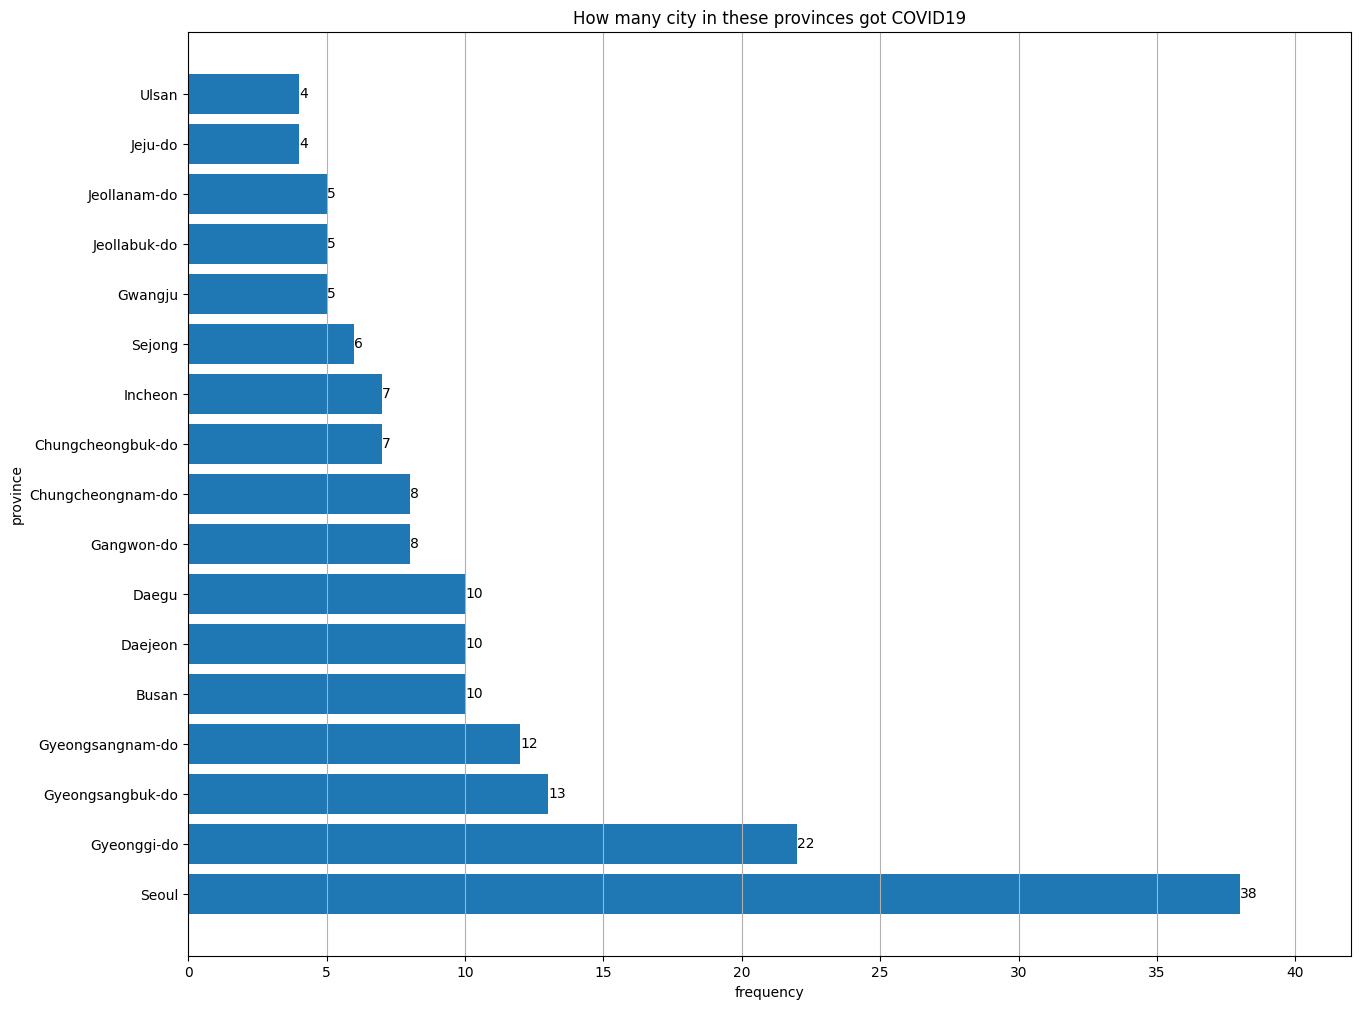

In [ ]:
count_city_in_province = case.groupby(['province'])['city'].count().sort_values(ascending=False)
fig = plt.figure(figsize=(15,12))
ax = fig.gca()
bar_container = ax.barh(count_city_in_province.index,count_city_in_province.values)

ax.set_xlim(0,42)
ax.set_ylim()
ax.set_xlabel('frequency')
ax.set_ylabel('province')

ax.set_title("How many city in these provinces got COVID19")
ax.bar_label(bar_container, fmt='{:,.0f}')
plt.grid(True,axis='x')
plt.show()


The bar chart displays the distribution of COVID-19 cases across provinces in South Korea. Each bar represents a province, and the length of the bar indicates the number of cities within the province that have reported COVID-19 cases. The chart provides an overview of the regional impact of the pandemic, helping identify provinces with a higher frequency of affected cities. This information can be valuable in guiding decision-making and resource allocation to combat the spread of the virus effectively.

Which provinces and city has highest average confirmed COVID-19 ?

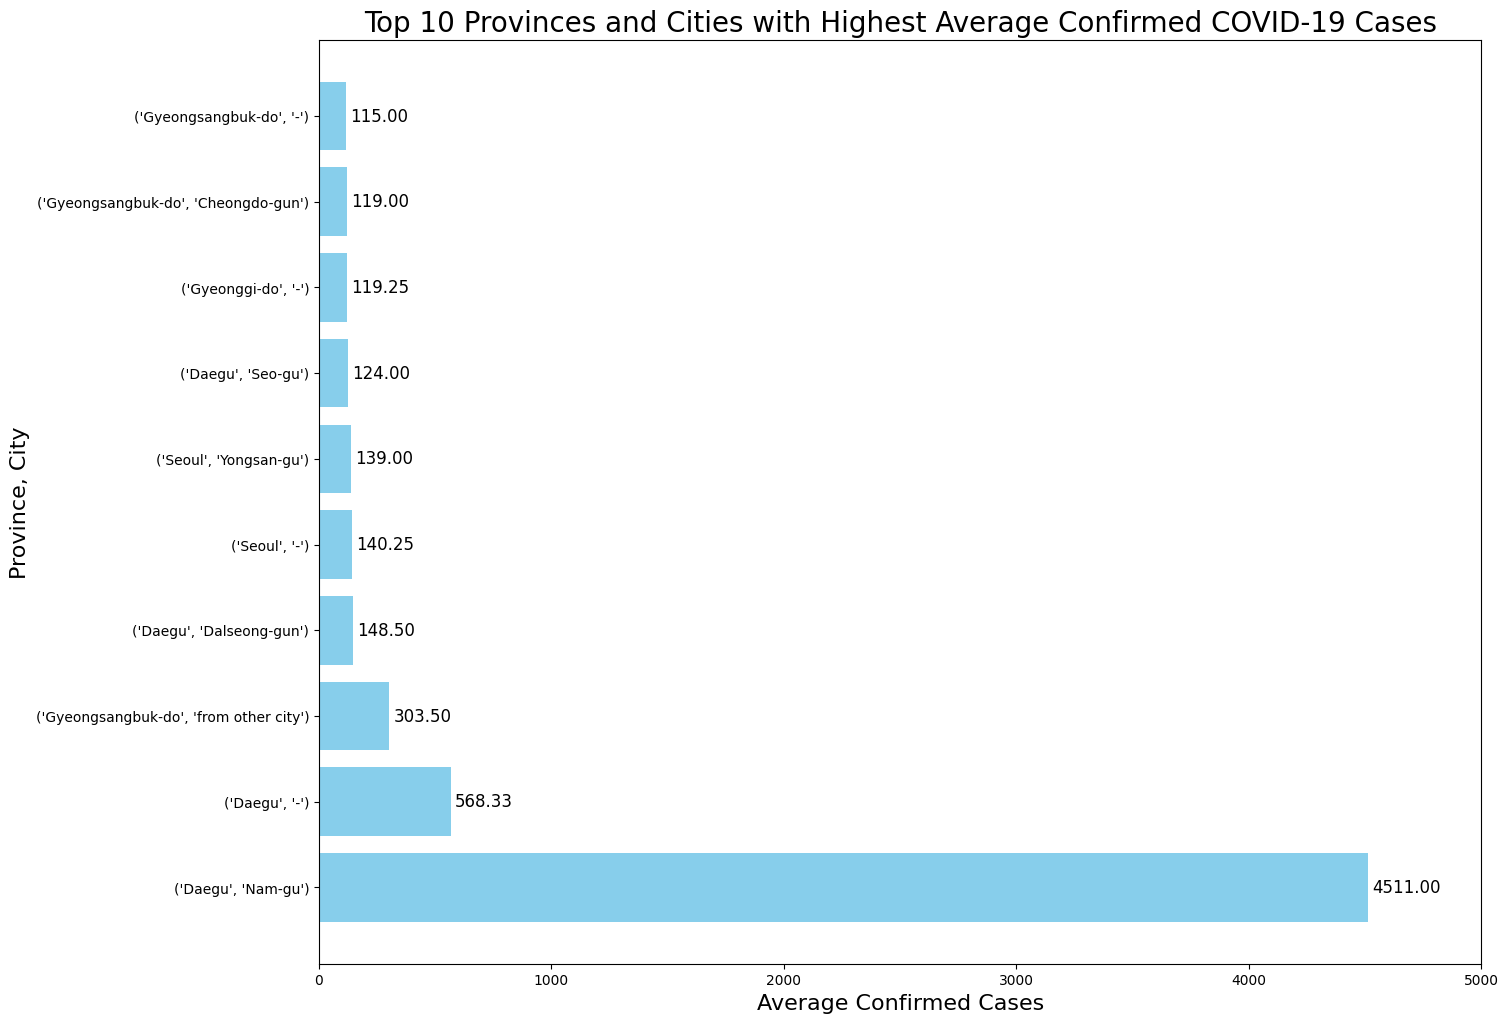

In [8]:
average_confirmed = case.groupby(['province','city'])['confirmed'].mean().sort_values(ascending=False)
confirmed_people = average_confirmed.head(10)

fig, ax = plt.subplots(figsize=(15,12))

bar_chart = ax.barh(confirmed_people.index.map(str), confirmed_people.values, color='skyblue')

ax.bar_label(bar_chart, fmt='%.2f', padding=3, fontsize=12,)
ax.set_xlabel('Average Confirmed Cases', fontsize=16)
ax.set_xlim(0,5000,auto=True)
ax.set_ylabel('Province, City', fontsize=16)
plt.title("Top 10 Provinces and Cities with Highest Average Confirmed COVID-19 Cases",fontsize=20, fontdict={'family': 'Comic Sans MS'})

plt.show()


**Top 10 Provinces and Cities with Highest Average Confirmed COVID-19 Cases**

This horizontal bar chart displays the top 10 provinces and cities in South Korea with the highest average number of confirmed COVID-19 cases. The length of each bar represents the average confirmed cases, providing insights into the regions that have experienced a significant impact of the virus. The chart serves as a tool for policymakers to identify hotspots and allocate resources effectively to combat the spread of COVID-19.

* Consider implementing localized restrictions, such as targeted lockdowns or
enhanced movement controls, in the provinces and cities with high case averages. These measures can help contain the virus's spread and protect vulnerable populations.

**Which top 10 infection has highest average confirmed COVID-19 ?**

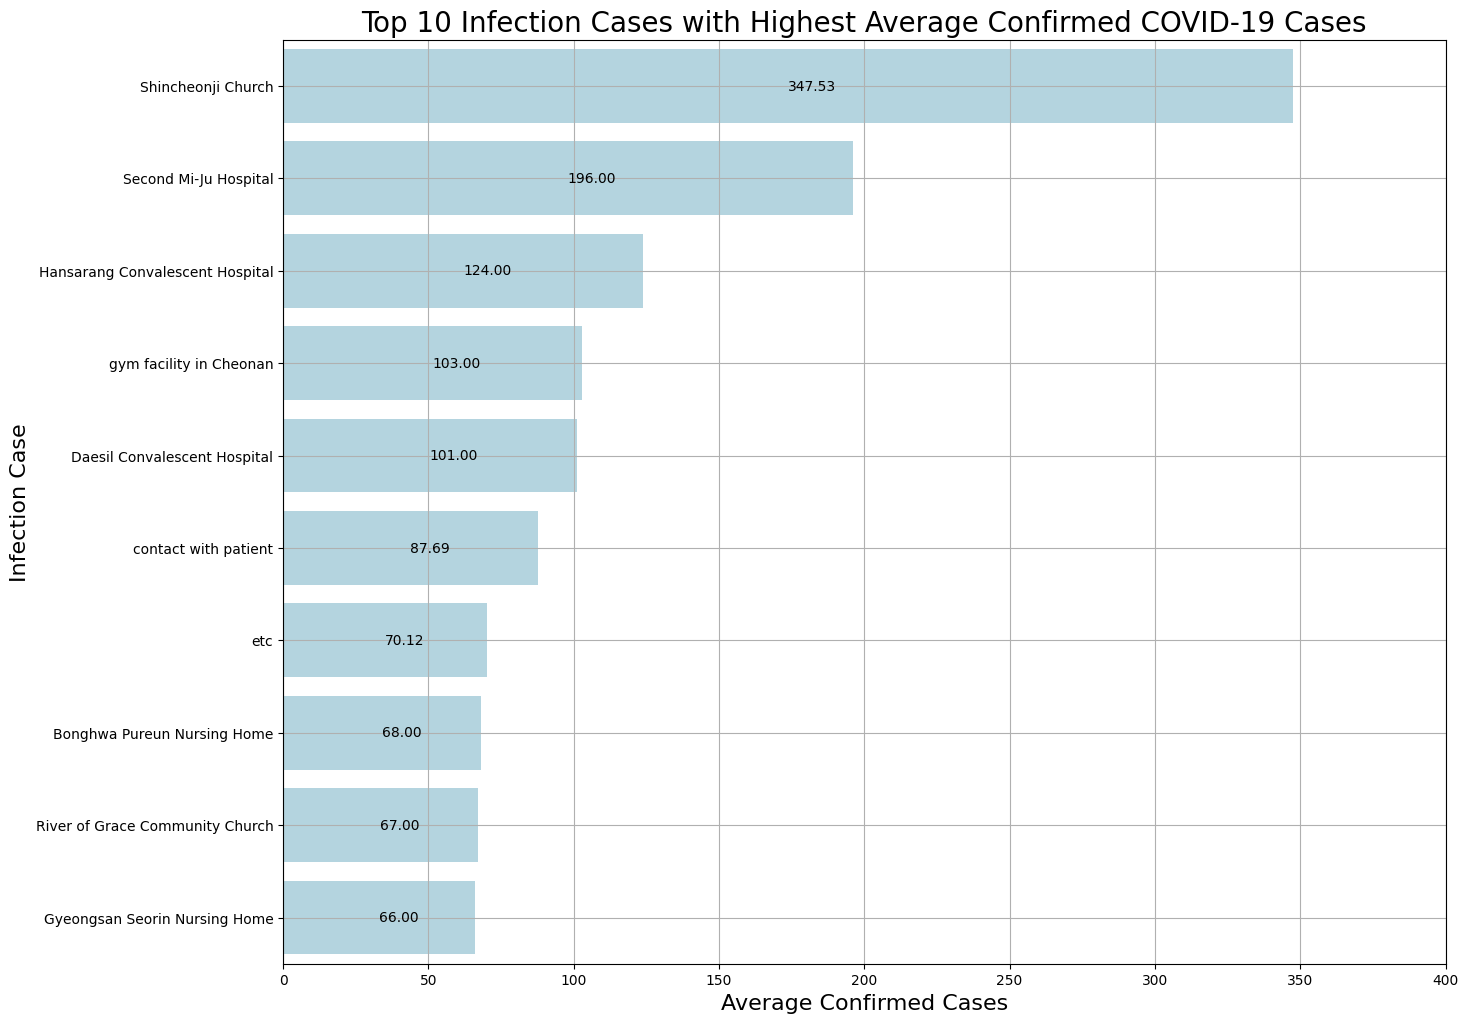

In [ ]:
infection_cases = case.groupby(['infection_case'])['confirmed'].mean()
infection_cases_sorted = infection_cases.sort_values(ascending=False).head(10).reset_index()


fig, ax = plt.subplots(figsize=(15,12))
bar_plot = sns.barplot(x='confirmed', y='infection_case', data=infection_cases_sorted, orient='h', ax=ax,color='lightblue')

# Loop over the bars
for p in ax.patches:
    # Get the width and height of the bar
    width = p.get_width()
    height = p.get_height()
    # Put the text in the middle of the bar
    ax.text(x = width/2,
            y = p.get_y()+(height/2),
            s = '{:.2f}'.format(width),
            va = 'center')
#ax.bar_label(bar_plot, fmt='%.2f', padding=3, fontsize=12,)
ax.set_title("Top 10 Infection Cases with Highest Average Confirmed COVID-19 Cases", fontsize=20)
ax.set_xlabel('Average Confirmed Cases', fontsize=16)
ax.set_ylabel('Infection Case', fontsize=16)
ax.set_xlim(0,400)
plt.grid(True)
plt.show()


This horizontal bar chart displays the top 10 infection cases in South Korea with the highest average number of confirmed COVID-19 cases. Each bar represents an infection case, and the length of the bar indicates the average number of confirmed cases associated with that infection case. The chart helps identify the primary sources of infection and provides insights into the contribution of each case to the overall spread

* Implement targeted interventions and preventive measures for the identified top infection cases. This can include specific measures such as increased testing, contact tracing, and monitoring in locations or settings associated with these infection cases. By focusing on these high-impact sources, it becomes possible to contain the spread and reduce the overall transmission rate.

**Here I want to know about group values
how many persent has true or false in gropu ?**

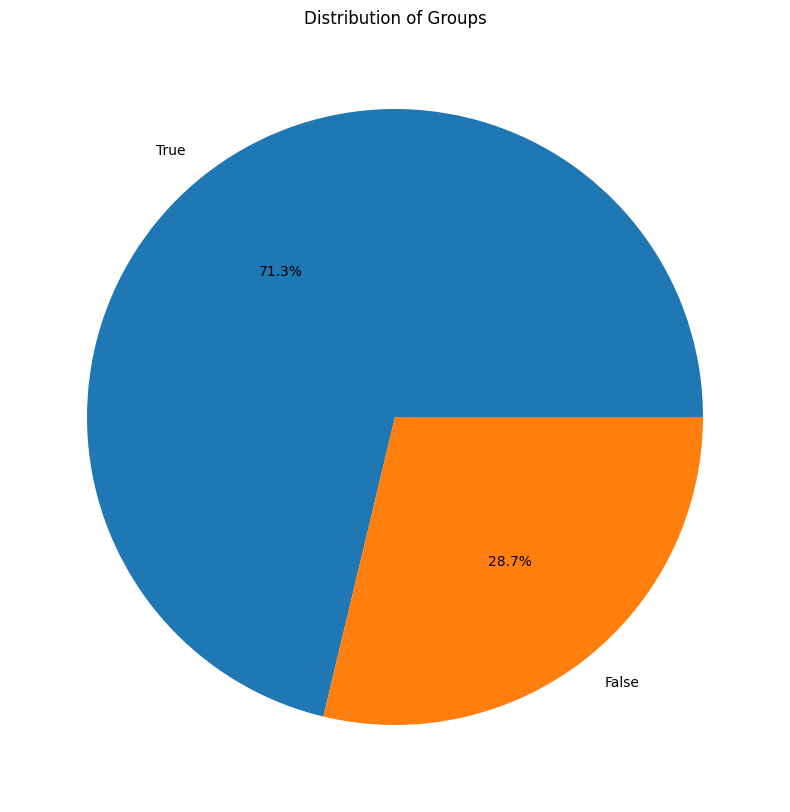

In [9]:
group_counts = case['group'].value_counts()

plt.figure(figsize=(10,10))
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Groups')
plt.show()


* The purpose of this visualization is to provide an overview of the distribution of groups within the COVID-19 dataset. It helps understand the proportion of cases attributed to different group categories, such as individuals from specific organizations, gatherings, or events.

**First of all, I want to know about how many infection effect in group and how many infection affect in individual area ?**

In [15]:
infection_case_group = case.groupby(['group'])['infection_case'].value_counts()
infection_case_group

group  infection_case                 
False  etc                                17
       overseas inflow                    17
       contact with patient               16
True   Shincheonji Church                 15
       Itaewon Clubs                       9
                                          ..
       Yeonana News Class                  1
       Yeongdeungpo Learning Institute     1
       Yongin Brothers                     1
       gym facility in Cheonan             1
       gym facility in Sejong              1
Name: infection_case, Length: 81, dtype: int64

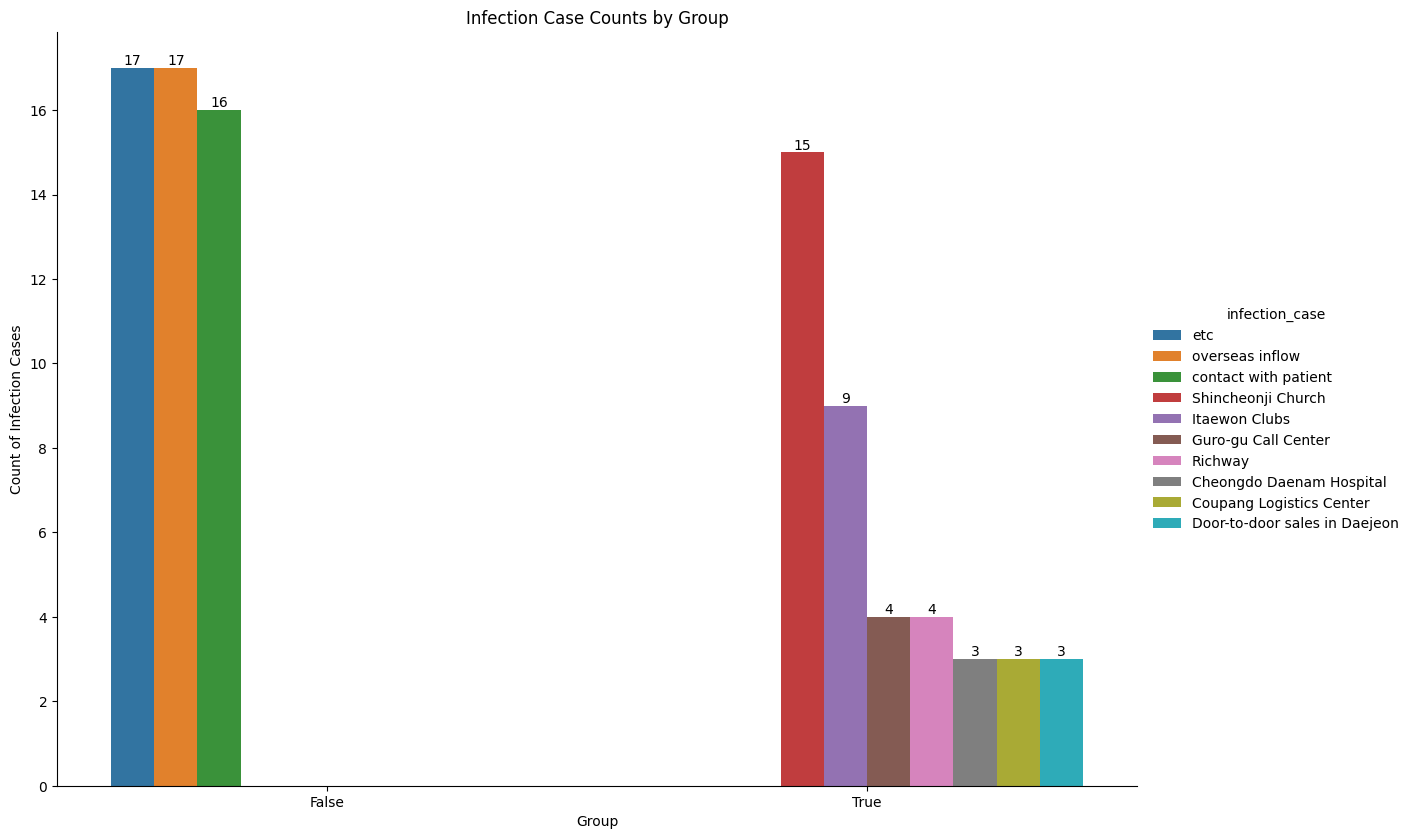

In [22]:
# Grouping the data by 'group', counting the unique values of 'infection_case',
# resetting the index, selecting the top 10, and sorting by 'count' in descending order
infection_case_group = (case.groupby(['group'])['infection_case']
                        .value_counts()
                        .reset_index(name='count')
                        .head(10)
                        .sort_values(by='count', ascending=False))

# Creating a bar plot of infection cases by group
g = sns.catplot(data=infection_case_group, x='group', y='count', hue='infection_case',
                kind='bar', height=8.27, aspect=11.7/8.27, palette='tab10')

# Adding title and labels
plt.title('Infection Case Counts by Group')
plt.xlabel('Group')
plt.ylabel('Count of Infection Cases')

# Getting the axis object
ax = g.ax

# Loop through the bars and add the count labels
for container in ax.containers:
    ax.bar_label(container)

# Displaying the plot
plt.show()


Overall, the chart visualizes the distribution of COVID-19 cases across provinces in South Korea. Each marker represents a province, and the size and color of the markers can be customized. The popups provide additional details about each province, including the city within the province and the number of confirmed cases. This visualization can help understand the geographical spread of COVID-19 cases and identify regions with higher case counts.

In [11]:
# Filter out rows with invalid latitude or longitude values
valid_data = case[(case['latitude'] != '-') & (case['longitude'] != '-')]

# Group the valid data by province and calculate the total confirmed cases
province_confirmed = valid_data.groupby('province')['confirmed'].sum().reset_index()

# Create a base map centered on South Korea
map = folium.Map(location=[36.5, 127.5], zoom_start=7)

# Create a marker cluster group
marker_cluster = MarkerCluster().add_to(map)

# Loop through each province and add markers to the map
for _, row in province_confirmed.iterrows():
    province = row['province']
    confirmed = row['confirmed']
    city = valid_data[valid_data['province'] == province]['city'].values[0]
    latitude = float(valid_data[valid_data['province'] == province]['latitude'].values[0])
    longitude = float(valid_data[valid_data['province'] == province]['longitude'].values[0])

    # Create a marker for each province
    folium.Marker(
        location=[latitude, longitude],
        popup=f"Province: {province}<br>City: {city}<br>Confirmed Cases: {confirmed}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(marker_cluster)

# Display the map
map


In [13]:
# Filter out rows with missing or invalid latitude and longitude values
valid_data = case[(case['latitude'] != '-') & (case['longitude'] != '-')]

# Group the valid data by province and infection case
province_infection_case = valid_data.groupby(['province', 'infection_case']).size().reset_index(name='count')

# Create a base map centered on South Korea
map = folium.Map(location=[36.5, 127.5], zoom_start=7)

# Create a marker cluster group
marker_cluster = MarkerCluster().add_to(map)

# Loop through each province and infection case and add markers to the map
for _, row in province_infection_case.iterrows():
    province = row['province']
    infection_case = row['infection_case']
    count = row['count']
    city = valid_data[(valid_data['province'] == province) & (valid_data['infection_case'] == infection_case)]['city'].values[0]
    latitude = valid_data[(valid_data['province'] == province) & (valid_data['infection_case'] == infection_case)]['latitude'].values[0]
    longitude = valid_data[(valid_data['province'] == province) & (valid_data['infection_case'] == infection_case)]['longitude'].values[0]

    try:
        latitude = float(latitude)
        longitude = float(longitude)

        # Create a marker for each province and infection case
        folium.Marker(
            location=[latitude, longitude],
            popup=f"Province: {province}<br>City: {city}<br>Infection Case: {infection_case}<br>Count: {count}",
            icon=folium.Icon(color='red', icon='info-sign')
        ).add_to(marker_cluster)
    except ValueError:
        continue

# Display the map
map


This updated visualization provides a more detailed view of the COVID-19 cases in South Korea by showing markers for specific infection cases within each province

# PatientInfo

## Data Cleaning patientInfo

This is a seccond sorse for analiz data about patient information , Here at the fisrt I want to know about data

In [ ]:
result_patientInfo = data_cleaning(patientInfo)
result_patientInfo

======== Data Overview ========

Shape of data: (5165, 14)

Columns in data: 
['patient_id', 'sex', 'age', 'country', 'province', 'city', 'infection_case', 'infected_by', 'contact_number', 'symptom_onset_date', 'confirmed_date', 'released_date', 'deceased_date', 'state']

======== Data Info ========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5165 non-null   int64 
 1   sex                 4043 non-null   object
 2   age                 3785 non-null   object
 3   country             5165 non-null   object
 4   province            5165 non-null   object
 5   city                5071 non-null   object
 6   infection_case      4246 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  690 non-null    object
 10  confirmed_d

OK first of all I have to have index for looking for and serching and accesing better data in dataframe and use set_index method in pandas to 'patient_id'

In [25]:
# Setting 'patient_id' as the index for efficient lookup and better data alignment.
# This also emphasizes the uniqueness of each patient's data in the dataset.
patientInfo.set_index('patient_id',inplace=True)

I think , at the first I should to separate string char from number in age column

used to identify the unique set of characters that appear as the last character in each entry of the age column in the patientInfo DataFrame.

In [26]:
patientInfo['age'].str[-1:].unique()

array(['s', nan], dtype=object)

OK we have only 'nan' and 's' char in the end of number

As I know , 20s means aged between 20 and 29 , now I should fine the solutions to remove 's' char

The code you provided is used to count how many entries in the 'age' column of the patientInfo DataFrame have their last character as 's'.

In [27]:
how_many_s_char = patientInfo['age'].str[-1:] == 's'
how_many_s_char.sum()

3785

ok that means we have 3785 rows has a 's' char in the end (is not null value)

And
we have 1380 null value
5165 - 3785 = 1380
first I remove 's' from end of numbers

In [28]:
if 'age' in patientInfo.columns:
    patientInfo['age'] = patientInfo['age'].apply(lambda x: int(str(x).replace('s','')) if str(x).endswith('s') else (x))

Check and convert age ranges ending with 's' (e.g., '20s') to integers for consistency in the 'age' column.
This ensures that all age data is in a numerical format, which is essential for statistical analysis and modeling.

In [29]:
patientInfo['age']

patient_id
1000000001    50.0
1000000002    30.0
1000000003    50.0
1000000004    20.0
1000000005    20.0
              ... 
7000000015    30.0
7000000016     NaN
7000000017     NaN
7000000018     NaN
7000000019     NaN
Name: age, Length: 5165, dtype: float64

Yes , Here we have only intiger number whitout 's' and NaN value

Now I want to know which rows in age column has NaN value

used to select and display all the rows in the patientInfo DataFrame where the value in the 'age' column is missing (NaN).

In [30]:
patientInfo.loc[patientInfo['age'].isnull()]

sex  age     country          province          city  \
patient_id                                                         
1000000564  NaN  NaN       Korea             Seoul   Jungnang-gu   
1000000565  NaN  NaN       Korea             Seoul  Seongdong-gu   
1000000566  NaN  NaN       Korea             Seoul     Gwanak-gu   
1000000567  NaN  NaN       Korea             Seoul    Gangnam-gu   
1000000568  NaN  NaN       Korea             Seoul      Nowon-gu   
...         ...  ...         ...               ...           ...   
6100000130  NaN  NaN       Korea  Gyeongsangnam-do  Hapcheon-gun   
7000000016  NaN  NaN       Korea           Jeju-do       Jeju-do   
7000000017  NaN  NaN  Bangladesh           Jeju-do       Jeju-do   
7000000018  NaN  NaN  Bangladesh           Jeju-do       Jeju-do   
7000000019  NaN  NaN  Bangladesh           Jeju-do       Jeju-do   

             infection_case infected_by contact_number symptom_onset_date  \
patient_id                                                                  
1000000564              etc         NaN            NaN                NaN   
1000000565  overseas inflow         NaN            NaN                NaN   
1000000566  overseas inflow         NaN            NaN                NaN   
1000000567  overseas inflow         NaN            NaN                NaN   
1000000568  overseas inflow         NaN            NaN                NaN   
...                     ...         ...            ...                ...   
6100000130  overseas inflow         NaN            NaN                NaN   
7000000016  overseas inflow         NaN            NaN                NaN   
7000000017  overseas inflow         NaN             72                NaN   
7000000018  overseas inflow         NaN            NaN                NaN   
7000000019  overseas inflow         NaN            NaN                NaN   

           confirmed_date released_date deceased_date     state  
patient_id                                                       
1000000564     2020-04-06           NaN           NaN  released  
1000000565     2020-04-06           NaN           NaN  released  
1000000566     2020-04-06           NaN           NaN  released  
1000000567     2020-04-06           NaN           NaN  released  
1000000568     2020-04-06           NaN           NaN  released  
...                   ...           ...           ...       ...  
6100000130     2020-06-15           NaN           NaN  released  
7000000016     2020-06-16    2020-06-24           NaN  released  
7000000017     2020-06-18           NaN           NaN  isolated  
7000000018     2020-06-18           NaN           NaN  isolated  
7000000019     2020-06-18           NaN           NaN  isolated  

[1380 rows x 13 columns]

Here we want to know how many rows in other columns has related by NaN in age columns

attempting to find rows in the patientInfo DataFrame where the 'age' column has the value 'NaN' as a string and then count the number of non-missing values for each column in the resulting DataFrame.

In [31]:
find_NaN = patientInfo.mask(patientInfo['age'] == 'NaN')
find_NaN.count()

sex                   4043
age                   3785
country               5165
province              5165
city                  5071
infection_case        4246
infected_by           1346
contact_number         791
symptom_onset_date     690
confirmed_date        5162
released_date         1587
deceased_date           66
state                 5165
dtype: int64

if I use loc method in pandas I can know sex columns NaN values in data has related with which columns values

selects and stores all the rows in the patientInfo DataFrame where the value in the 'sex' column is missing (NaN) into a new DataFrame named find_NaN_sex.

In [32]:
find_NaN_sex = patientInfo.loc[patientInfo['sex'].isnull()]
find_NaN_sex

sex  age     country          province          city  \
patient_id                                                         
1000000564  NaN  NaN       Korea             Seoul   Jungnang-gu   
1000000565  NaN  NaN       Korea             Seoul  Seongdong-gu   
1000000566  NaN  NaN       Korea             Seoul     Gwanak-gu   
1000000567  NaN  NaN       Korea             Seoul    Gangnam-gu   
1000000568  NaN  NaN       Korea             Seoul      Nowon-gu   
...         ...  ...         ...               ...           ...   
6100000130  NaN  NaN       Korea  Gyeongsangnam-do  Hapcheon-gun   
7000000016  NaN  NaN       Korea           Jeju-do       Jeju-do   
7000000017  NaN  NaN  Bangladesh           Jeju-do       Jeju-do   
7000000018  NaN  NaN  Bangladesh           Jeju-do       Jeju-do   
7000000019  NaN  NaN  Bangladesh           Jeju-do       Jeju-do   

             infection_case infected_by contact_number symptom_onset_date  \
patient_id                                                                  
1000000564              etc         NaN            NaN                NaN   
1000000565  overseas inflow         NaN            NaN                NaN   
1000000566  overseas inflow         NaN            NaN                NaN   
1000000567  overseas inflow         NaN            NaN                NaN   
1000000568  overseas inflow         NaN            NaN                NaN   
...                     ...         ...            ...                ...   
6100000130  overseas inflow         NaN            NaN                NaN   
7000000016  overseas inflow         NaN            NaN                NaN   
7000000017  overseas inflow         NaN             72                NaN   
7000000018  overseas inflow         NaN            NaN                NaN   
7000000019  overseas inflow         NaN            NaN                NaN   

           confirmed_date released_date deceased_date     state  
patient_id                                                       
1000000564     2020-04-06           NaN           NaN  released  
1000000565     2020-04-06           NaN           NaN  released  
1000000566     2020-04-06           NaN           NaN  released  
1000000567     2020-04-06           NaN           NaN  released  
1000000568     2020-04-06           NaN           NaN  released  
...                   ...           ...           ...       ...  
6100000130     2020-06-15           NaN           NaN  released  
7000000016     2020-06-16    2020-06-24           NaN  released  
7000000017     2020-06-18           NaN           NaN  isolated  
7000000018     2020-06-18           NaN           NaN  isolated  
7000000019     2020-06-18           NaN           NaN  isolated  

[1122 rows x 13 columns]

Here I used count method for know how many values in other columns in NaN values in age column.
 selects all the rows in the patientInfo DataFrame where the value in the 'age' column is missing (NaN), and then counts the number of non-missing values for each column in the resulting DataFrame.

In [33]:
find_NaN_age = patientInfo.loc[patientInfo['age'].isnull()]
find_NaN_age.count()

sex                    261
age                      0
country               1380
province              1380
city                  1375
infection_case        1288
infected_by            385
contact_number          14
symptom_onset_date     136
confirmed_date        1380
released_date           11
deceased_date            0
state                 1380
dtype: int64

And Here I find out age column is very important column and in the same columns if we dont have values ,

performs a grouping and aggregation operation on the DataFrame find_NaN_age, which contains rows with missing values in the 'age' column from the original patientInfo DataFrame.

In [34]:
find_NaN_age.groupby(['sex'])['infection_case'].value_counts()

sex     infection_case          
female  contact with patient        110
        Coupang Logistics Center     20
        overseas inflow              12
        etc                           3
        Shincheonji Church            2
        Itaewon Clubs                 1
male    contact with patient         76
        Coupang Logistics Center     12
        overseas inflow              11
        Itaewon Clubs                 4
        Shincheonji Church            2
        etc                           2
        Richway                       1
Name: infection_case, dtype: int64

Series showing the count of each unique infection case, grouped by sex, only considering the rows where the 'age' column has missing values. This kind of analysis can be useful for understanding patterns or relationships between the 'sex' and 'infection_case' columns specifically for the subset of data with missing age values.

removes all the rows from the patientInfo DataFrame where the 'age' column contains missing values (NaN), and assigns the resulting DataFrame back to patientInfo.

In [35]:
patientInfo =  patientInfo.dropna(subset=['age'])

I removed all the NaN rows in age columns becuase :

Data Quality: Having missing values in a dataset, especially in a crucial column like 'age', can affect the quality and reliability of the data. Removing these rows helps in ensuring that the analyses or models built using this data are more accurate.

Statistical Analysis: For certain statistical analyses, it is important to have complete data. Having missing values in the 'age' column could distort the results of statistical tests or cause them to be invalid.

In [36]:
patientInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3785 entries, 1000000001 to 7000000015
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 3782 non-null   object 
 1   age                 3785 non-null   float64
 2   country             3785 non-null   object 
 3   province            3785 non-null   object 
 4   city                3696 non-null   object 
 5   infection_case      2958 non-null   object 
 6   infected_by         961 non-null    object 
 7   contact_number      777 non-null    object 
 8   symptom_onset_date  554 non-null    object 
 9   confirmed_date      3782 non-null   object 
 10  released_date       1576 non-null   object 
 11  deceased_date       66 non-null     object 
 12  state               3785 non-null   object 
dtypes: float64(1), object(12)
memory usage: 414.0+ KB


In [37]:
patientInfo.isnull().sum()

sex                      3
age                      0
country                  0
province                 0
city                    89
infection_case         827
infected_by           2824
contact_number        3008
symptom_onset_date    3231
confirmed_date           3
released_date         2209
deceased_date         3719
state                    0
dtype: int64

Here I am goning to know is there any duplicated values in dataframe or not ? calculates the total number of duplicated rows in the patientInfo DataFrame.

In [38]:
patientInfo.duplicated(keep=False).sum()

363

Here there are 363 duplicated values in this data and we have to know why and how I can handle it ?

creates a boolean mask called duplicated_rows to identify duplicated rows in the patientInfo DataFrame, and then uses this mask to select and display those duplicated rows.

In [39]:
duplicated_rwos = patientInfo.duplicated()
patientInfo[duplicated_rwos]

sex   age country          province             city  \
patient_id                                                            
1000000152  female  40.0   Korea             Seoul              etc   
1000000154  female  50.0   Korea             Seoul          Guro-gu   
1000000158  female  40.0   Korea             Seoul       Dongjak-gu   
1000000167  female  40.0   Korea             Seoul  Yeongdeungpo-gu   
1000000168  female  40.0   Korea             Seoul  Yeongdeungpo-gu   
...            ...   ...     ...               ...              ...   
6020000024  female  30.0   Korea  Gyeongsangbuk-do     Cheongdo-gun   
6020100055    male  50.0   Korea  Gyeongsangbuk-do     Cheongdo-gun   
6022000011    male  40.0   Korea  Gyeongsangbuk-do      Chilgok-gun   
6022000036  female  20.0   Korea  Gyeongsangbuk-do      Chilgok-gun   
6023000015    male  20.0   Korea  Gyeongsangbuk-do        Pohang-si   

                      infection_case infected_by contact_number  \
patient_id                                                        
1000000152       Guro-gu Call Center         NaN            NaN   
1000000154       Guro-gu Call Center         NaN            NaN   
1000000158       Guro-gu Call Center         NaN            NaN   
1000000167       Guro-gu Call Center         NaN            NaN   
1000000168       Guro-gu Call Center         NaN            NaN   
...                              ...         ...            ...   
6020000024  Cheongdo Daenam Hospital         NaN            NaN   
6020100055  Cheongdo Daenam Hospital         NaN            NaN   
6022000011                       NaN         NaN            NaN   
6022000036                       NaN         NaN            NaN   
6023000015                       NaN         NaN            NaN   

           symptom_onset_date confirmed_date released_date deceased_date  \
patient_id                                                                 
1000000152                NaN     2020-03-09           NaN           NaN   
1000000154                NaN     2020-03-09           NaN           NaN   
1000000158                NaN     2020-03-10           NaN           NaN   
1000000167                NaN     2020-03-10           NaN           NaN   
1000000168                NaN     2020-03-10           NaN           NaN   
...                       ...            ...           ...           ...   
6020000024                NaN     2020-02-26           NaN           NaN   
6020100055                NaN     2020-02-19           NaN    2020-02-23   
6022000011                NaN     2020-02-25           NaN           NaN   
6022000036                NaN     2020-03-01           NaN           NaN   
6023000015                NaN     2020-02-26    2020-03-21           NaN   

               state  
patient_id            
1000000152  released  
1000000154  released  
1000000158  released  
1000000167  released  
1000000168  released  
...              ...  
6020000024  released  
6020100055  deceased  
6022000011  isolated  
6022000036  isolated  
6023000015  released  

[218 rows x 13 columns]

Now I want to find out which columns has duplicate values ? iterates through each column in the patientInfo DataFrame, checks if there are any duplicated values in each column, and appends the column names with duplicated values to the columns_has_duplicated list. Finally, it prints the number of columns that have duplicated values along with their names.

In [40]:
columns_has_duplicated = []
for column in patientInfo.columns:
    if patientInfo.duplicated(subset=[column]).any():
        columns_has_duplicated.append(column)

print(f'{len(columns_has_duplicated)} columns has duplicated are :{columns_has_duplicated}')

13 columns has duplicated are :['sex', 'age', 'country', 'province', 'city', 'infection_case', 'infected_by', 'contact_number', 'symptom_onset_date', 'confirmed_date', 'released_date', 'deceased_date', 'state']


Here I find all columns (13 columns) has duplicated values and I should know how I can handel that ?

In [41]:
find_dup = patientInfo.where(patientInfo.duplicated())
find_dup.count()

sex                   218
age                   218
country               218
province              218
city                  211
infection_case        108
infected_by            42
contact_number          5
symptom_onset_date      3
confirmed_date        218
released_date          67
deceased_date           2
state                 218
dtype: int64

trying to find and count duplicated rows in the patientInfo DataFrame.

In [42]:
find_dup = patientInfo[patientInfo.duplicated()]
num_duplicated_rows = find_dup.shape[0]
num_duplicated_rows

218

This method considers all columns to detect duplicates, and by default, it keeps the first occurrence of the duplicate and drops the subsequent ones.

In [43]:
patientInfo = patientInfo.drop_duplicates()

In [44]:
find_dup = patientInfo.where(patientInfo.duplicated())
find_dup.count()

sex                   0
age                   0
country               0
province              0
city                  0
infection_case        0
infected_by           0
contact_number        0
symptom_onset_date    0
confirmed_date        0
released_date         0
deceased_date         0
state                 0
dtype: int64

In [45]:
patientInfo.duplicated().sum()

0

In [46]:
patientInfo.T.duplicated()

sex                   False
age                   False
country               False
province              False
city                  False
infection_case        False
infected_by           False
contact_number        False
symptom_onset_date    False
confirmed_date        False
released_date         False
deceased_date         False
state                 False
dtype: bool

OK we dont have any duplicated values here goood !

Now I want to know each columns has which type ?

In [47]:
patientInfo.dtypes

sex                    object
age                   float64
country                object
province               object
city                   object
infection_case         object
infected_by            object
contact_number         object
symptom_onset_date     object
confirmed_date         object
released_date          object
deceased_date          object
state                  object
dtype: object

In [48]:
patientInfo[['symptom_onset_date','confirmed_date','released_date','deceased_date']].isnull().sum()

symptom_onset_date    3016
confirmed_date           3
released_date         2058
deceased_date         3503
dtype: int64

Oh! My God Here we have many null values and we have to be carefull for changing type of data !!!

We have 4 columns thoese has date values but here we have object type and we can not use these values by date .
Now I will change the type from object to datetime by use pd.to_datetime method in pandas .

In [49]:
date_columns = patientInfo[['symptom_onset_date','confirmed_date','released_date','deceased_date']]
for i in date_columns:
    patientInfo[i] = pd.to_datetime(patientInfo[i], errors='coerce')


 We are converting the columns that contain date information into datetime objects, which is a common preprocessing step when working with time series data.

In [50]:
patientInfo.dtypes

sex                           object
age                          float64
country                       object
province                      object
city                          object
infection_case                object
infected_by                   object
contact_number                object
symptom_onset_date    datetime64[ns]
confirmed_date        datetime64[ns]
released_date         datetime64[ns]
deceased_date         datetime64[ns]
state                         object
dtype: object

Here I want to change type of two columns , because those values is numirical in patientInfo 'infected_by' and 'contact_number'.

In [51]:
numric_columns = patientInfo[['infected_by','contact_number']]
for i in numric_columns:
    patientInfo[i] = pd.to_numeric(patientInfo[i], errors='coerce')

 We are converting the columns that contain numeric information into numeric data types. This is a common data preprocessing step when you want to ensure that the data types of the columns are appropriate for numerical analysis

In [52]:
patientInfo.dtypes

sex                           object
age                          float64
country                       object
province                      object
city                          object
infection_case                object
infected_by                  float64
contact_number               float64
symptom_onset_date    datetime64[ns]
confirmed_date        datetime64[ns]
released_date         datetime64[ns]
deceased_date         datetime64[ns]
state                         object
dtype: object

## Visualization patientInfo

This visualization provides insights into the distribution of ages among the patients in the dataset. The histogram bins represent age ranges, and the height of each bar represents the frequency (count) of patients within that age range. It allows for an understanding of the age demographics of the patients and can be useful in analyzing the impact of age on the prevalence of the disease.

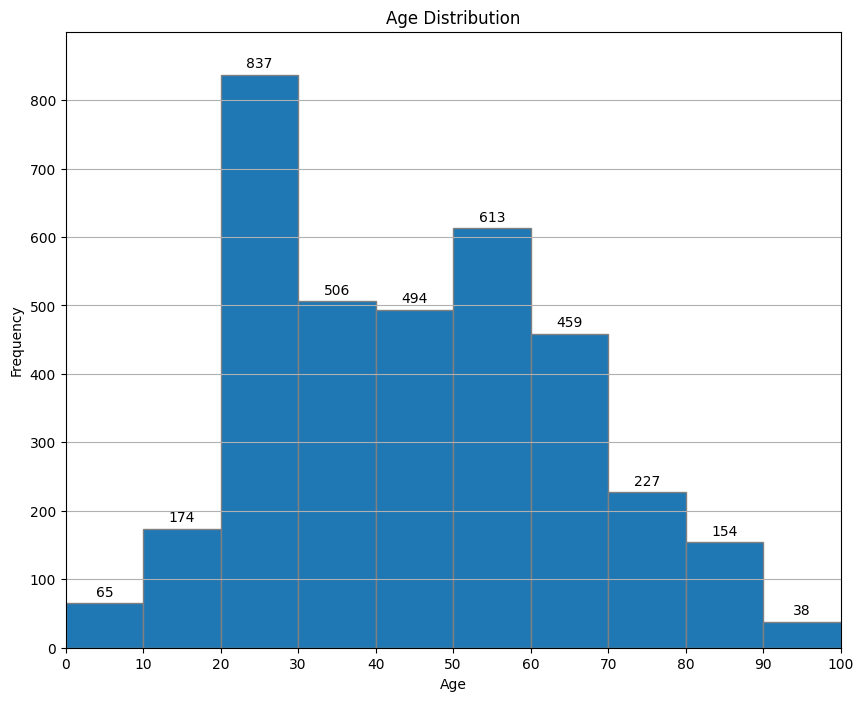

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# Create histogram
counts, bins, patches = ax.hist(patientInfo['age'], bins=10, edgecolor='gray')

# Label bins with frequency counts
for patch, count in zip(patches, counts):
    height = patch.get_height()
    ax.annotate(f'{int(count)}', xy=(patch.get_x() + patch.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_xlim(0, 100)
ax.set_xticks(range(0, 101, 10))
ax.set_ylim(0,900)
ax.set_yticks(range(0,900,100))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(True,axis='y')
plt.show()


This visualization provides insights into the gender distribution among the patients in the dataset.

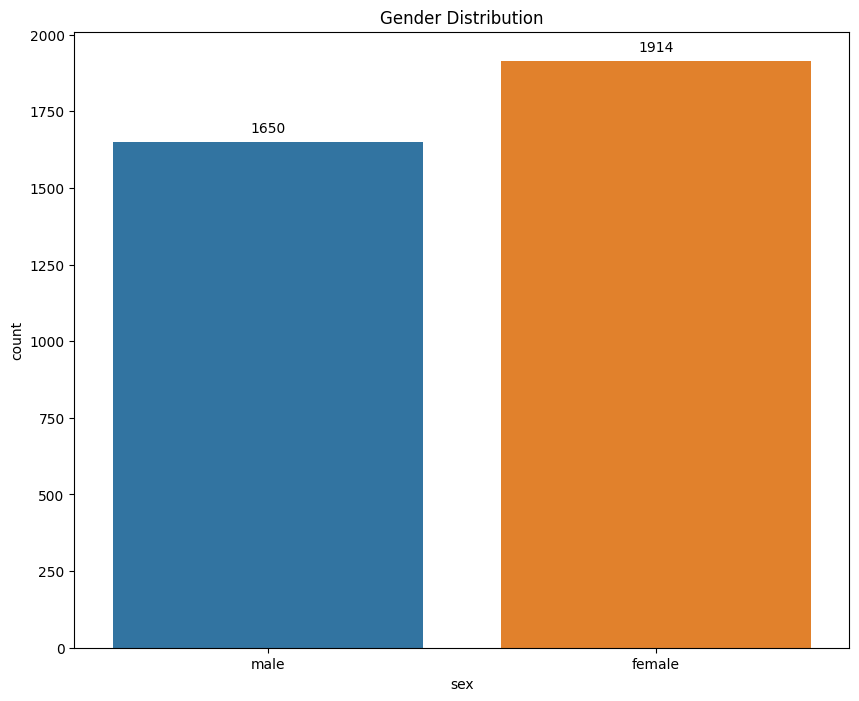

In [53]:
fig, ax = plt.subplots(figsize=(10, 8))

# Create a bar chart for the 'sex' column
gender_bar_chart = sns.countplot(data=patientInfo, x='sex')

# Annotate each bar with its height (count)
for p in gender_bar_chart.patches:
    gender_bar_chart.annotate(format(p.get_height(), '.0f'),
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add a title
plt.title('Gender Distribution')

# Display the plot
plt.show()


This visualization allows you to compare the distribution of patient sexes within each state, providing insights into the gender demographics within different states and their respective states of being deceased, isolated, or released.

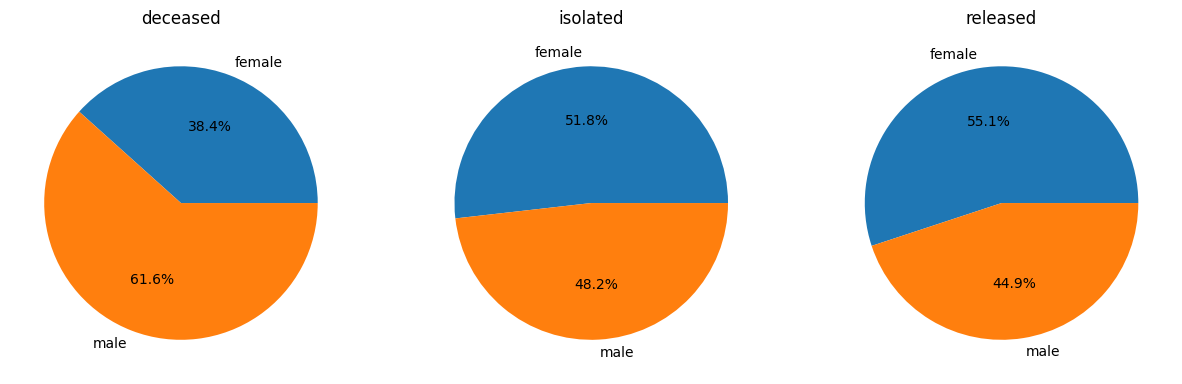

In [54]:
# Group by sex and state, and count the occurrences
sex_state = patientInfo.groupby(['sex', 'state']).size().reset_index(name='count')

# Get unique states
unique_states = sex_state['state'].unique()

# Create subplots
n_states = len(unique_states)
fig, axes = plt.subplots(nrows=1, ncols=n_states, figsize=(5*n_states, 5))

# Loop through each state and create a pie chart
for index, state in enumerate(unique_states):
    # Filter data for the current state
    data_for_state = sex_state[sex_state['state'] == state]

    # Create a pie chart on the current subplot
    axes[index].pie(data_for_state['count'], labels=data_for_state['sex'], autopct='%1.1f%%')
    axes[index].set_title(state)

# Show the plot
plt.show()


In [55]:
patientInfo['infection_case'].unique()

array(['overseas inflow', 'contact with patient', 'Seongdong-gu APT',
       'etc', "Eunpyeong St. Mary's Hospital", 'Shincheonji Church',
       'Dongan Church', 'Guro-gu Call Center', 'Itaewon Clubs',
       'Biblical Language study meeting', 'Coupang Logistics Center',
       'SMR Newly Planted Churches Group', 'KB Life Insurance',
       'Samsung Fire & Marine Insurance',
       'Seoul City Hall Station safety worker', nan, 'Richway',
       'Onchun Church', 'Cheongdo Daenam Hospital',
       'Suyeong-gu Kindergarten', 'Ministry of Oceans and Fisheries',
       'Orange Town', 'Dunsan Electronics Town',
       'gym facility in Cheonan', 'gym facility in Sejong',
       'River of Grace Community Church', 'Gyeongsan Seorin Nursing Home',
       'Gyeongsan Cham Joeun Community Center',
       'Gyeongsan Jeil Silver Town', 'Bonghwa Pureun Nursing Home',
       'Pilgrimage to Israel', 'Milal Shelter', 'Geochang Church',
       'Changnyeong Coin Karaoke'], dtype=object)

This visualization provides insights into the most common infection cases for each province.

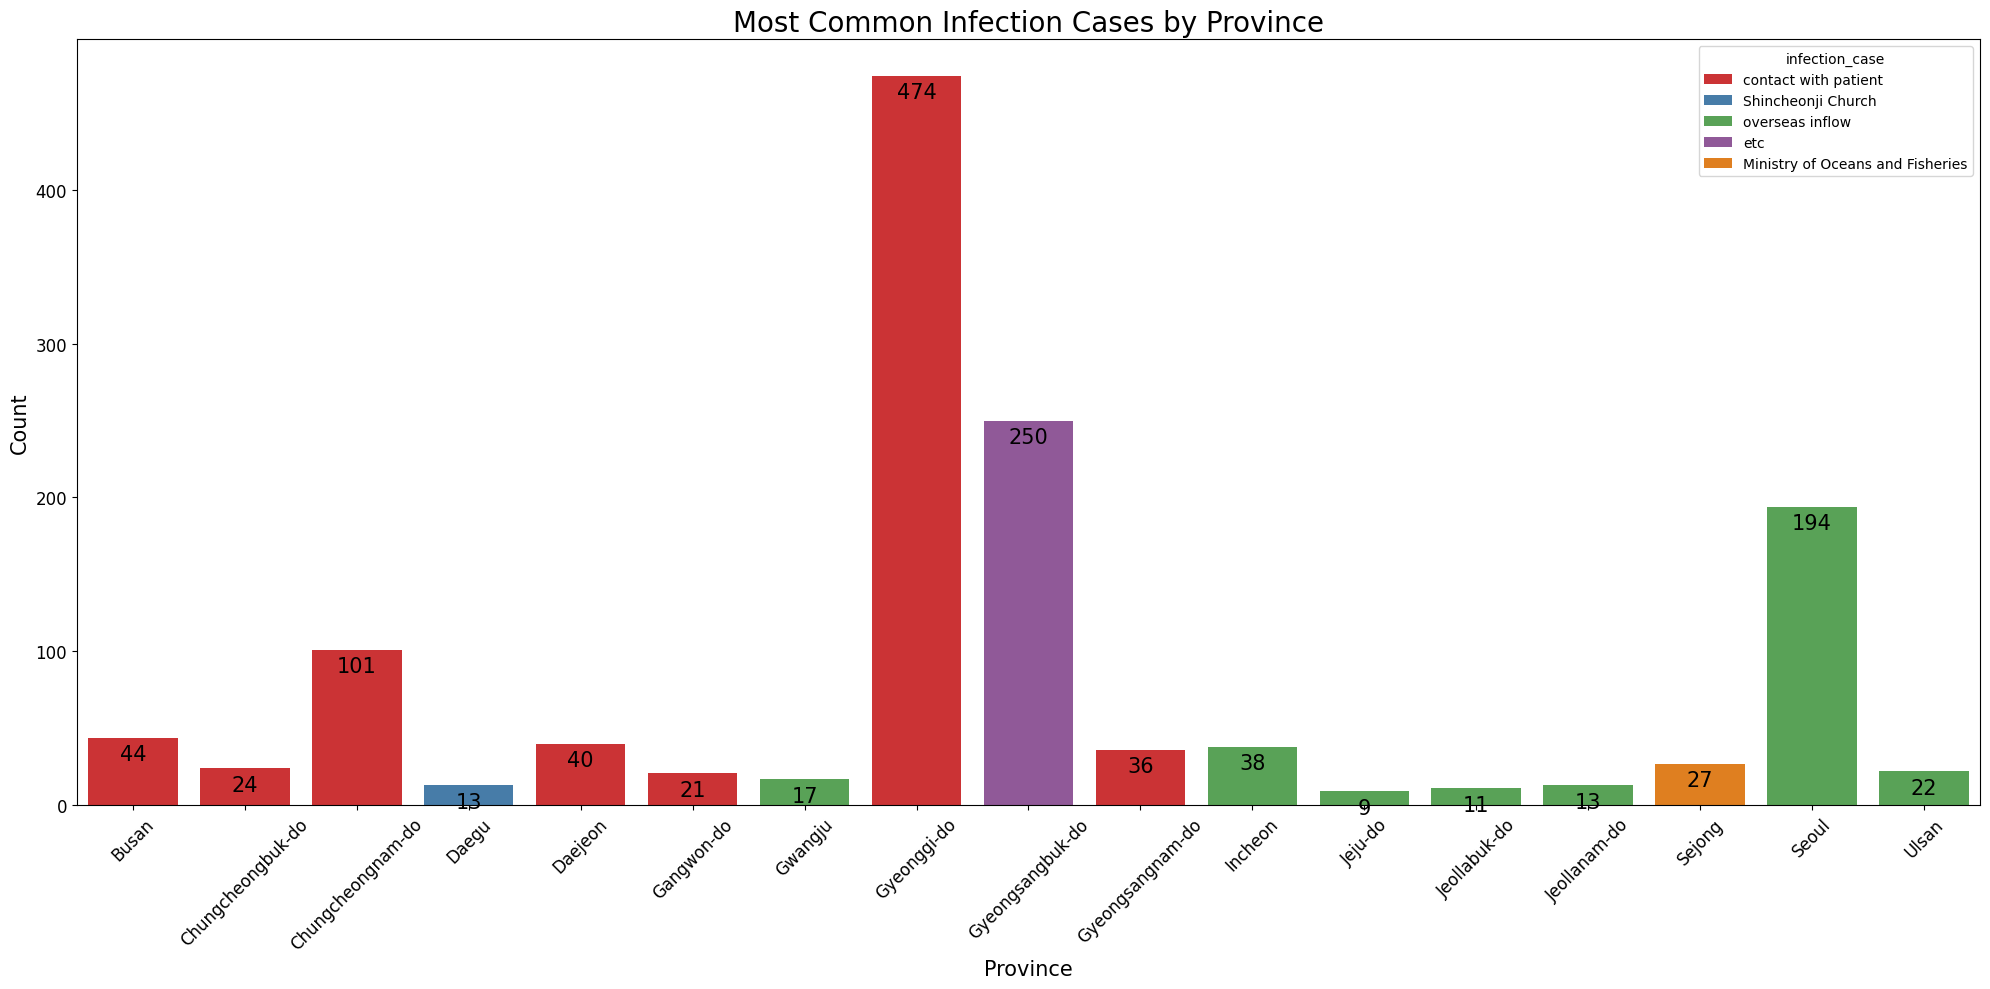

In [58]:
# Grouping the data by province and infection_case, and counting the occurrences
most_infection_province = patientInfo.groupby(['province', 'infection_case']).size().reset_index(name='count')

# Sort and keep the top infection_case for each province
most_infection_province = most_infection_province.sort_values(['province', 'count'], ascending=[True, False])
most_common_infection = most_infection_province.groupby('province').head(1)

# Creating the visualization
plt.figure(figsize=(20, 10))  # Increased figure size
bar_plot = sns.barplot(data=most_common_infection, x='province', y='count', hue='infection_case', palette='Set1', dodge=False)

# Adding labels and title
plt.xlabel("Province", fontsize=15)  # Increased fontsize for better readability
plt.ylabel("Count", fontsize=15)  # Increased fontsize for better readability
plt.title("Most Common Infection Cases by Province", fontsize=20)  # Increased fontsize for better readability
plt.xticks(rotation=45, fontsize=12)  # Rotated x-axis labels and increased fontsize for better readability
plt.yticks(fontsize=12)  # Increased fontsize for better readability

# To display value on each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   size=15,
                   xytext = (0, -12),
                   textcoords = 'offset points')

# Display the plot
plt.tight_layout()
plt.show()

This visualization provides a clear comparison of the top 10 infection cases based on their counts.

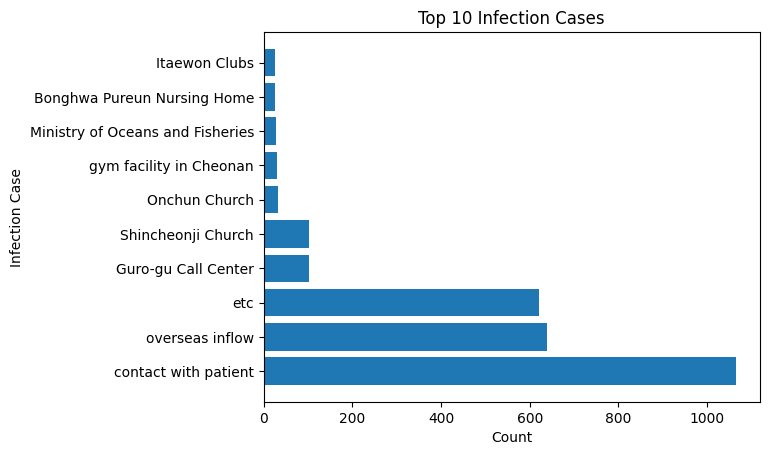

In [61]:
which_infection = patientInfo.groupby(['infection_case']).size().reset_index(name='count')
top_10_infection_case = which_infection.sort_values(by='count', ascending=False).head(10)

plt.barh(top_10_infection_case['infection_case'], top_10_infection_case['count'])
plt.xlabel('Count')
plt.ylabel('Infection Case')
plt.title('Top 10 Infection Cases')
plt.show()


This visualization provides insights into the most common infection cases for each sex category.

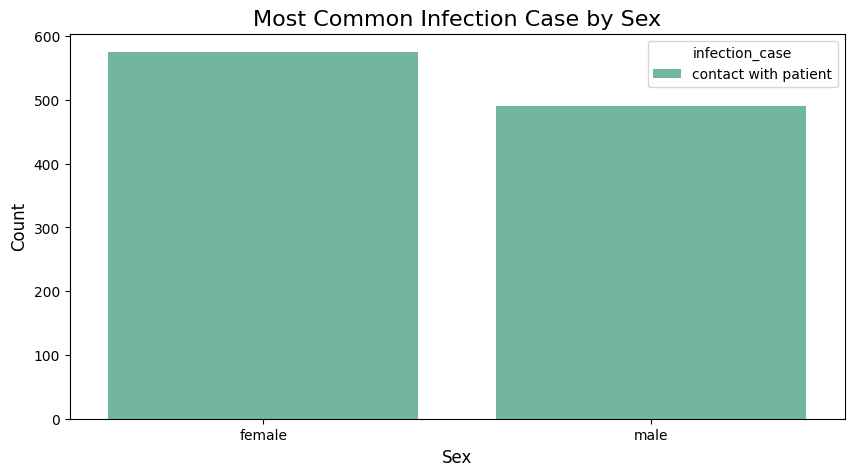

In [63]:
# Group by 'sex' and 'infection_case', and count the occurrences
infection_by_sex = patientInfo.groupby(['sex', 'infection_case']).size().reset_index(name='count')

# Sort and keep the top 'infection_case' for each 'sex'
infection_by_sex = infection_by_sex.sort_values(['sex', 'count'], ascending=[True, False])
most_common_infection_by_sex = infection_by_sex.groupby('sex').head(1)

# Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=most_common_infection_by_sex, x='sex', y='count', hue='infection_case', palette='Set2', dodge=False)

# Adding labels and title
plt.xlabel("Sex", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Most Common Infection Case by Sex", fontsize=16)

# Display the plot
plt.show()

This visualization provides insights into the most common infection cases for each age group, represented by the percentage of each infection case within the age group.

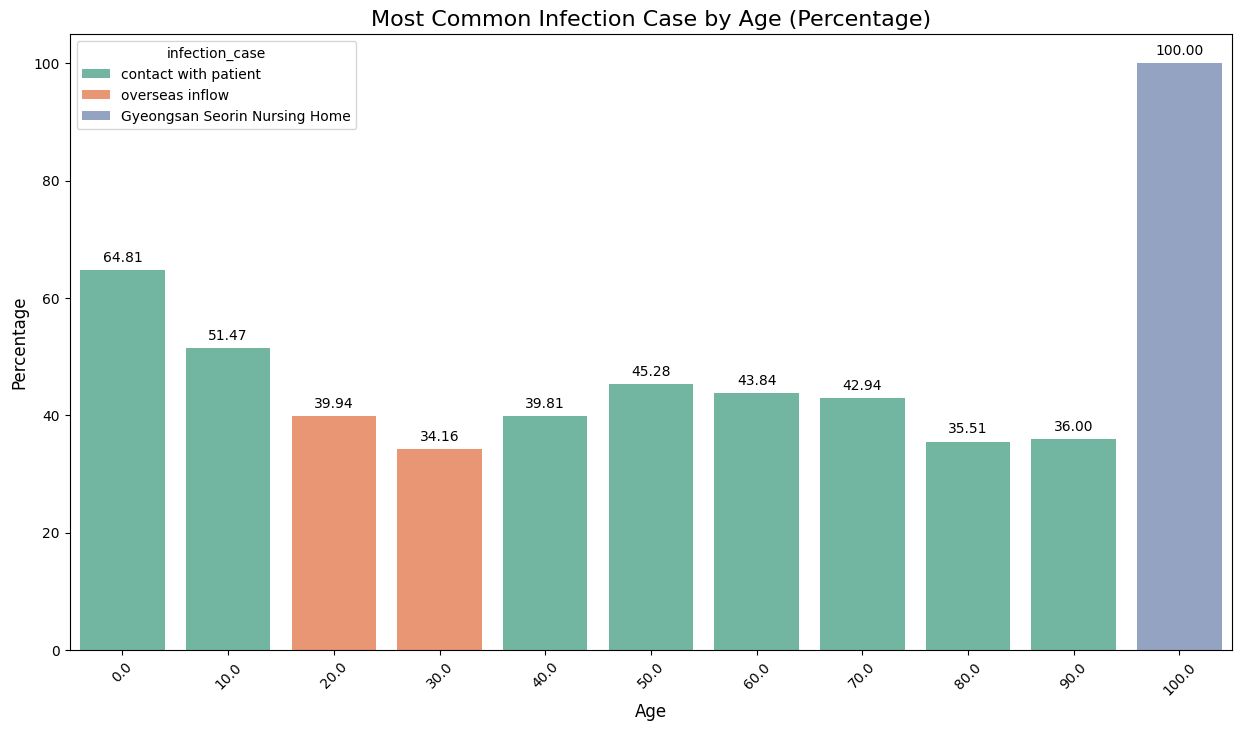

In [64]:
# Group by 'age' and 'infection_case', and count the occurrences
infection_by_age = patientInfo.groupby(['age', 'infection_case']).size().reset_index(name='count')

# Calculate the total number of cases for each age
total_by_age = infection_by_age.groupby('age')['count'].sum().reset_index(name='total')

# Merge the total back into the infection_by_age dataframe
infection_by_age = infection_by_age.merge(total_by_age, on='age')

# Calculate the percentage for each infection_case
infection_by_age['percentage'] = (infection_by_age['count'] / infection_by_age['total']) * 100

# Sort and keep the top 'infection_case' for each 'age'
infection_by_age = infection_by_age.sort_values(['age', 'percentage'], ascending=[True, False])
most_common_infection_by_age = infection_by_age.groupby('age').head(1)

# Create a bar plot
plt.figure(figsize=(15, 8))
barplot = sns.barplot(data=most_common_infection_by_age, x='age', y='percentage', hue='infection_case', palette='Set2', dodge=False)

# Adding labels and title
plt.xlabel("Age", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.title("Most Common Infection Case by Age (Percentage)", fontsize=16)

# Rotate x-labels for better visibility
plt.xticks(rotation=45)

# Adding annotations (percentages) on top of the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

# Display the plot
plt.show()


To understand the relation between confirmed_date and released_date, you can calculate the duration it took for each patient from the confirmed date of infection to the date they were released. This duration can then be analyzed to understand various aspects such as how long patients are typically under treatment, if there are any patterns or trends over time, or if other factors such as age, sex, or infection type play a role in the duration.

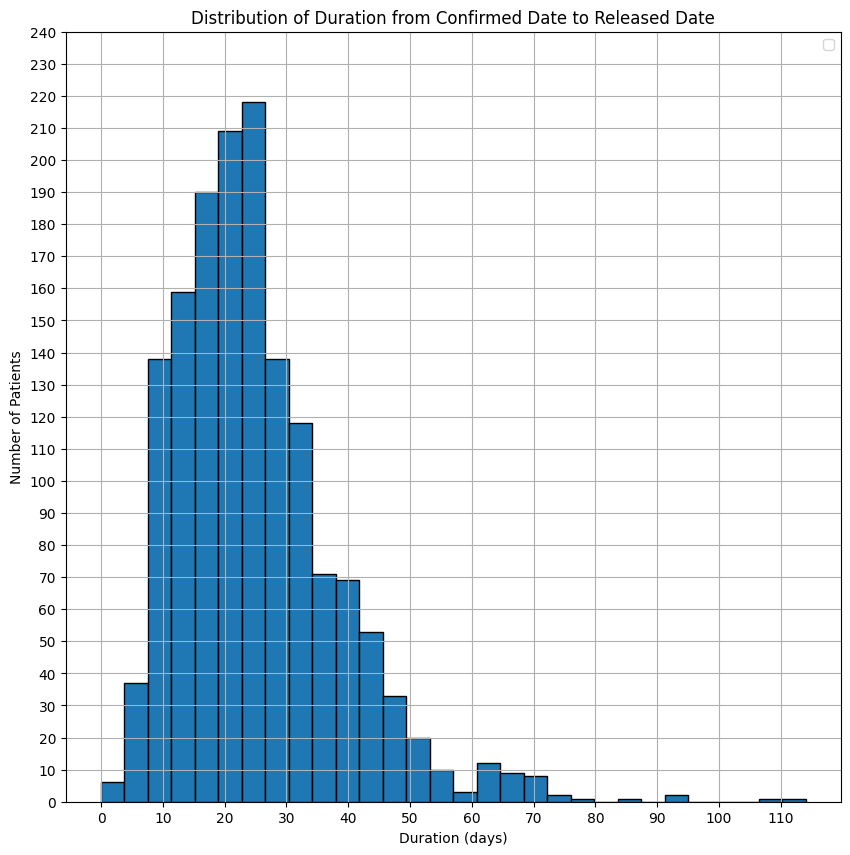

In [65]:
# Calculate the duration for each patient
patientInfo['duration'] = (patientInfo['released_date'] - patientInfo['confirmed_date']).dt.days

# create a histogram to see how the durations are distributed.
plt.figure(figsize=(10,10))
plt.hist(patientInfo['duration'].dropna(), bins=30, edgecolor='k')
plt.xticks(range(0,120,10))
plt.yticks(range(0,250,10))
plt.xlabel('Duration (days)')
plt.ylabel('Number of Patients')
plt.title('Distribution of Duration from Confirmed Date to Released Date')
plt.legend()
plt.grid()
plt.show()

Analyze if the duration changed over time (e.g., did patients start to recover faster in later months?).

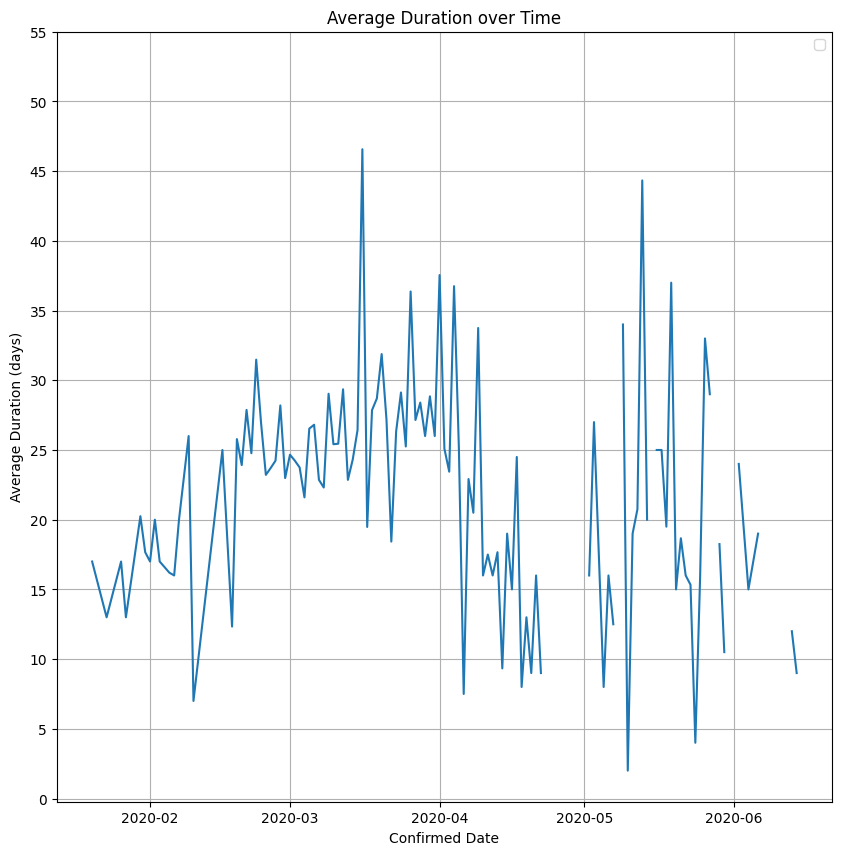

In [67]:
# Group by confirmed_date and calculate the average duration
avg_duration_by_date = patientInfo.groupby('confirmed_date')['duration'].mean().reset_index()

plt.figure(figsize=(10,10))
plt.plot(avg_duration_by_date['confirmed_date'], avg_duration_by_date['duration'])
plt.xlabel('Confirmed Date')
plt.ylabel('Average Duration (days)')
plt.title('Average Duration over Time')
plt.yticks(range(0,60,5))
plt.legend()
plt.grid()
plt.show()


This visualization provides insights into the distribution of case durations by sex. Each box represents the interquartile range (IQR), with the horizontal line inside the box representing the median duration. The whiskers extend to the minimum and maximum values within 1.5 times the IQR. Outliers are shown as individual points beyond the whiskers. The plot allows for a comparison of the duration distribution between different sexes and helps identify any differences or similarities in the duration of cases.

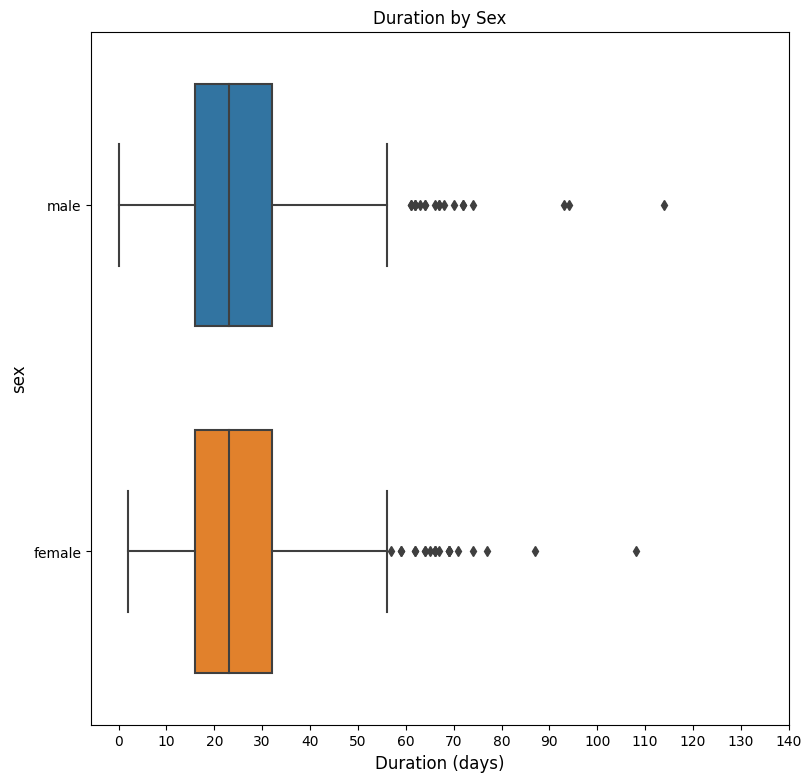

In [68]:
plt.figure(figsize=(9, 9))
sns.boxplot(x='duration', y='sex', data=patientInfo,orient='h', width=0.7)
plt.xlabel('Duration (days)',fontsize=12)
plt.xticks(range(0,150,10))
plt.ylabel('sex',fontsize=12)
plt.title('Duration by Sex')
plt.show()

This visualization provides insights into the distribution of the duration from symptom onset to confirmation for different age groups. Each box represents the interquartile range (IQR), with the horizontal line inside the box representing the median duration. The whiskers extend to the minimum and maximum values within 1.5 times the IQR. Outliers are shown as individual points beyond the whiskers. The plot allows for a comparison of the duration distribution across different age groups and helps identify any differences or similarities in the duration from symptom onset to confirmation.

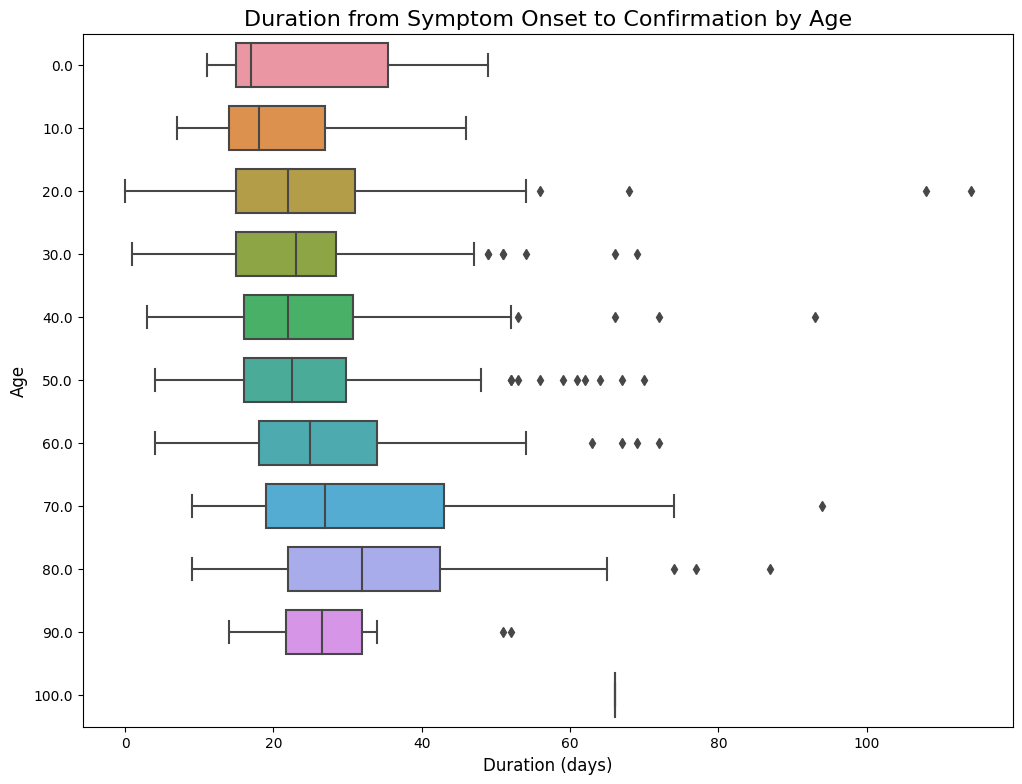

In [69]:
plt.figure(figsize=(12, 9)) # Increase the size of the plot

sns.boxplot(x='duration', y='age', data=patientInfo, orient='h', width=0.7) # Use horizontal boxplots

plt.xlabel('Duration (days)', fontsize=12) # Set x-axis label and font size
plt.ylabel('Age', fontsize=12) # Set y-axis label and font size
plt.title('Duration from Symptom Onset to Confirmation by Age', fontsize=16) # Set title and font size

plt.show()


This visualization provides insights into the distribution of the duration from symptom onset to confirmation for the patients in the dataset.

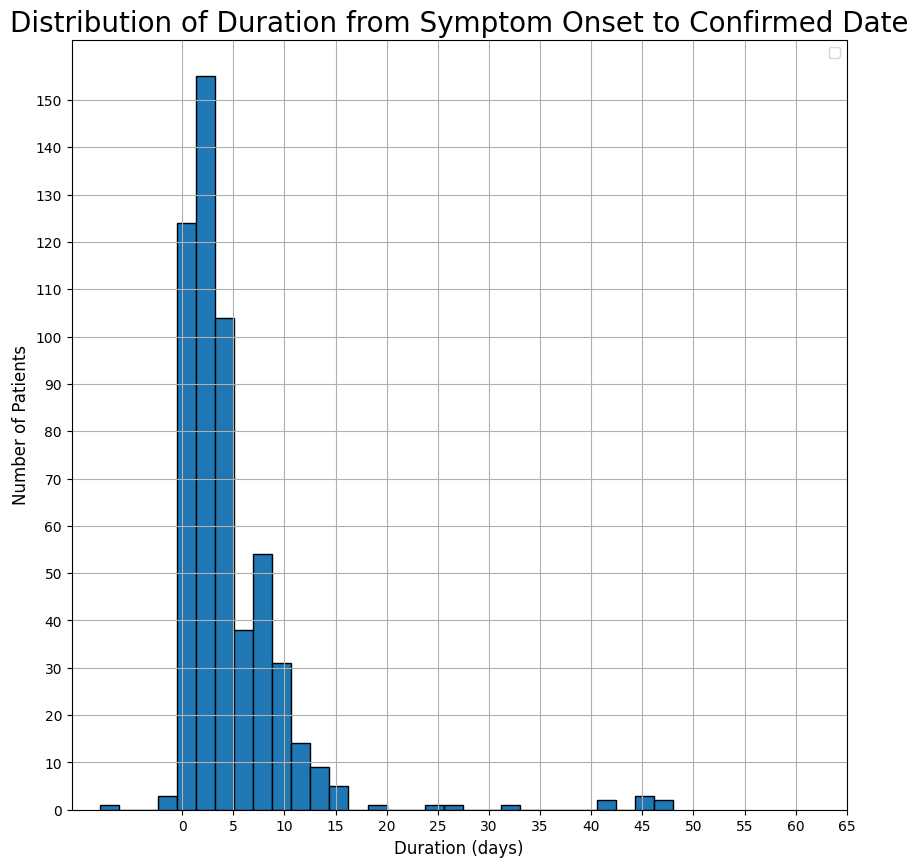

In [70]:
# Calculate duration
patientInfo['duration_to_confirmation'] = (patientInfo['confirmed_date'] - patientInfo['symptom_onset_date']).dt.days

plt.figure(figsize=(10,10))
plt.hist(patientInfo['duration_to_confirmation'].dropna(), bins=30, edgecolor='k')
plt.xlabel('Duration (days)',fontsize=12)
plt.ylabel('Number of Patients',fontsize=12)
plt.title('Distribution of Duration from Symptom Onset to Confirmed Date',fontsize=20)
plt.xticks(range(0,70,5))
plt.yticks(range(0,160,10))
plt.legend()
plt.grid()
plt.show()


This visualization helps analyze the trend and changes in the average duration from symptom onset to confirmation over time

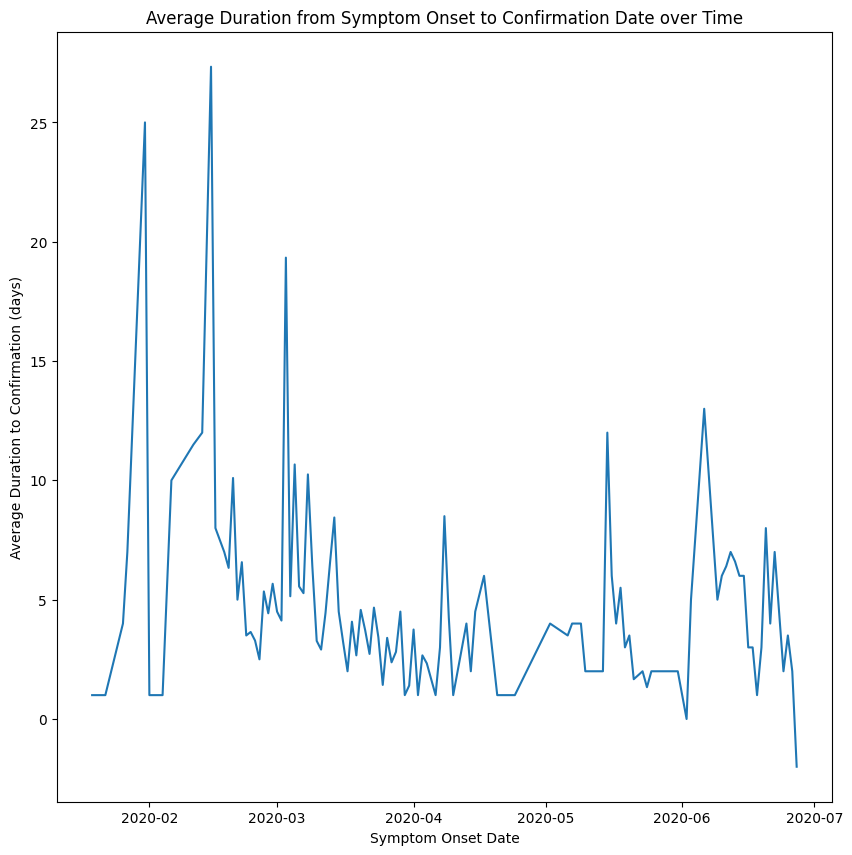

In [71]:
# Group by symptom_onset_date and calculate the average duration
avg_duration_by_onset_date = patientInfo.groupby('symptom_onset_date')['duration_to_confirmation'].mean().reset_index()
plt.figure(figsize=(10,10))

plt.plot(avg_duration_by_onset_date['symptom_onset_date'], avg_duration_by_onset_date['duration_to_confirmation'])
plt.xlabel('Symptom Onset Date')
plt.ylabel('Average Duration to Confirmation (days)')
plt.title('Average Duration from Symptom Onset to Confirmation Date over Time')
plt.show()

This visualization provides insights into the monthly trends of confirmed cases over time.

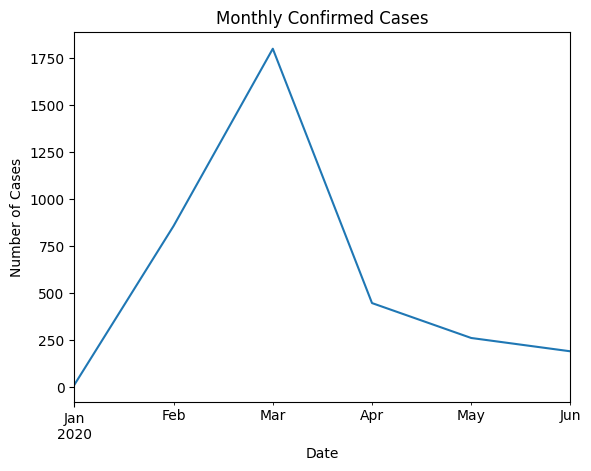

In [74]:
patientInfo.set_index('confirmed_date').resample('M').size().plot()
plt.title('Monthly Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.show()


# Policy

## Data Cleaning policy

In [75]:
result_policy = data_cleaning(policy)
result_policy

======== Data Overview ========

Shape of data: (61, 7)

Columns in data: 
['policy_id', 'country', 'type', 'gov_policy', 'detail', 'start_date', 'end_date']

======== Data Info ========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   policy_id   61 non-null     int64 
 1   country     61 non-null     object
 2   type        61 non-null     object
 3   gov_policy  61 non-null     object
 4   detail      59 non-null     object
 5   start_date  61 non-null     object
 6   end_date    24 non-null     object
dtypes: int64(1), object(6)
memory usage: 3.5+ KB

======== Data Description ========
        policy_id country         type                     gov_policy  detail  \
count   61.000000      61           61                             61      59   
unique        NaN       1            8                             24      57   
top           NaN   Ko

In [76]:
date_columns = policy[['start_date','end_date']]
for i in date_columns:
    policy[i] = pd.to_datetime(policy[i], errors='coerce')

In [77]:
policy.dtypes

policy_id              int64
country               object
type                  object
gov_policy            object
detail                object
start_date    datetime64[ns]
end_date      datetime64[ns]
dtype: object

In [78]:
policy.set_index('policy_id',inplace=True)

In [79]:
policy.head()

country         type                      gov_policy  \
policy_id                                                        
1           Korea        Alert  Infectious Disease Alert Level   
2           Korea        Alert  Infectious Disease Alert Level   
3           Korea        Alert  Infectious Disease Alert Level   
4           Korea        Alert  Infectious Disease Alert Level   
5           Korea  Immigration   Special Immigration Procedure   

                     detail start_date   end_date  
policy_id                                          
1            Level 1 (Blue) 2020-01-03 2020-01-19  
2          Level 2 (Yellow) 2020-01-20 2020-01-27  
3          Level 3 (Orange) 2020-01-28 2020-02-22  
4             Level 4 (Red) 2020-02-23        NaT  
5                from China 2020-02-04        NaT

## Visualization policy

This visualization provides insights into the frequency of each policy type. Each bar represents a policy type, and the height of the bar represents the frequency or count of occurrences.

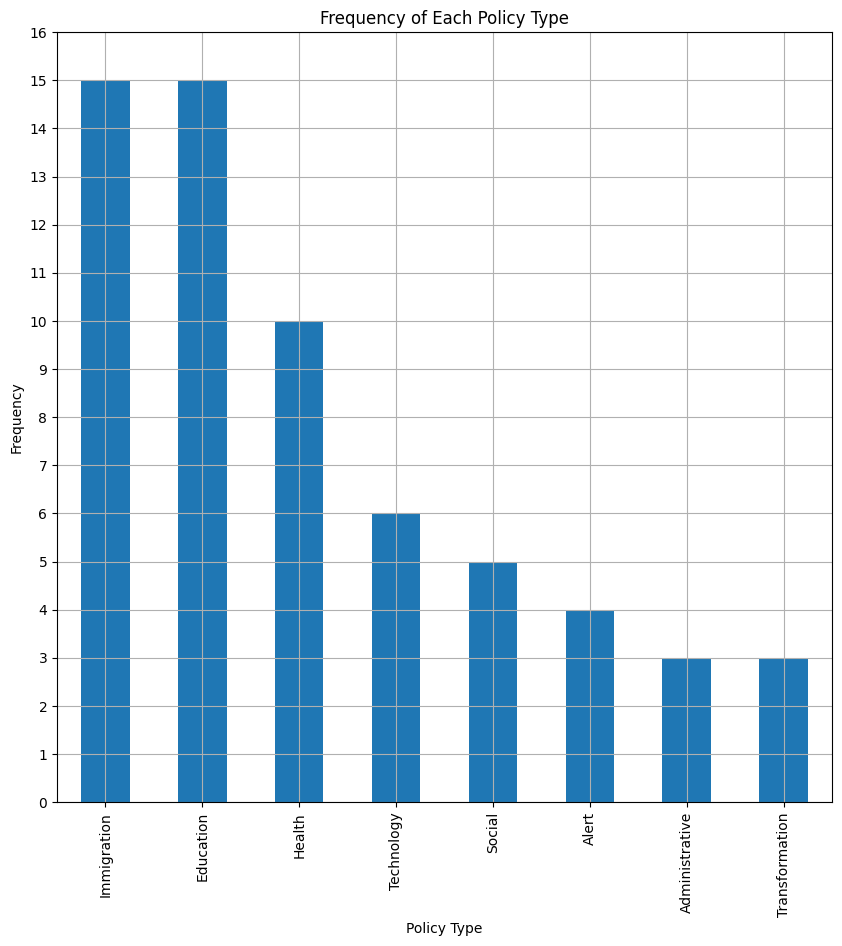

In [80]:
# Get the unique types and their counts
type_counts = policy['type'].value_counts()

# Plot a bar graph
plt.figure(figsize=(10,10))
type_counts.plot(kind='bar')
plt.title('Frequency of Each Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('Frequency')
plt.yticks(range(0,17,1))
plt.grid()
plt.show()

This visualization provides insights into the frequency of each government policy. Each horizontal bar represents a government policy, and the length of the bar represents the frequency or count of occurrence

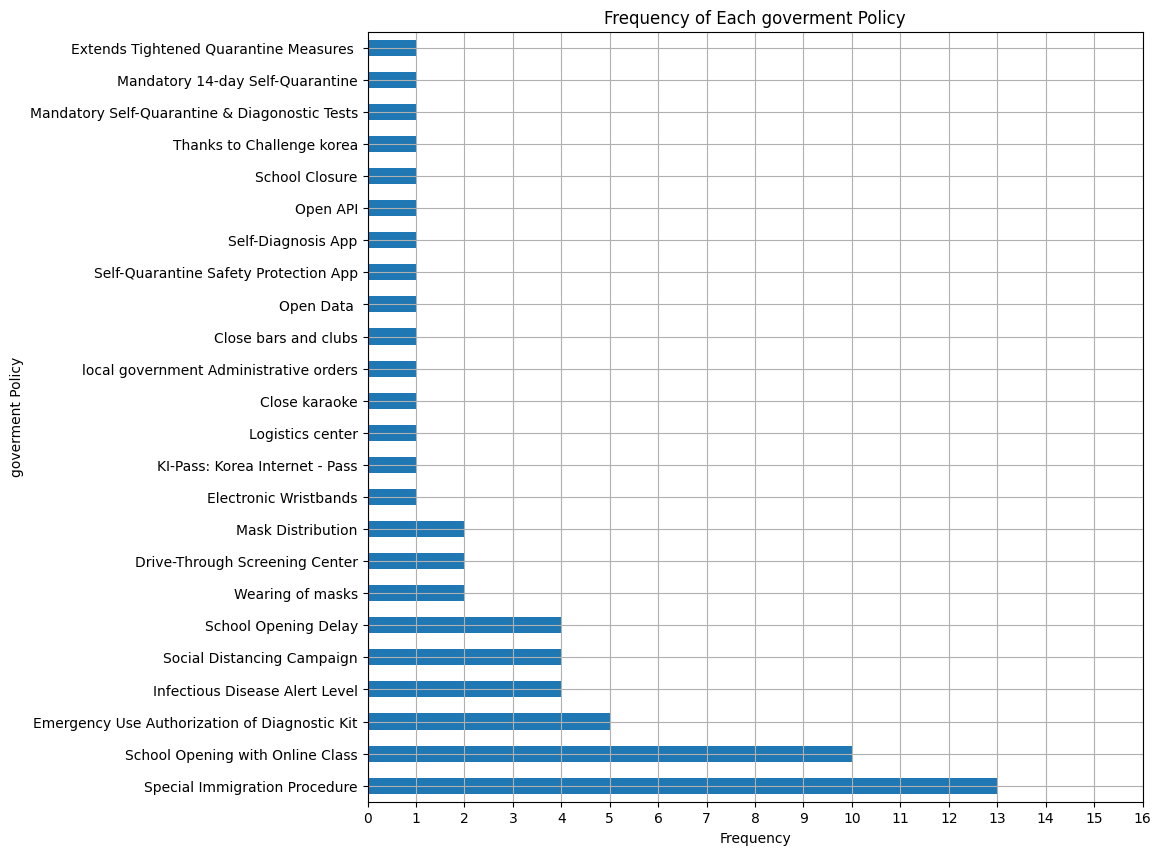

In [81]:
# Get the unique types and their counts
type_counts = policy['gov_policy'].value_counts()

# Plot a bar graph
plt.figure(figsize=(10,10))
type_counts.plot(kind='barh')
plt.title('Frequency of Each goverment Policy')
plt.xlabel('Frequency')
plt.ylabel('goverment Policy')
plt.xticks(range(0,17,1))
plt.grid()
plt.show()

This visualization provides insights into the total duration of each policy type. Each horizontal bar represents a policy type, and the length of the bar represents the total duration in days. It allows for a comparison of the total duration across different policy types and helps identify the policy types with the longest durations.

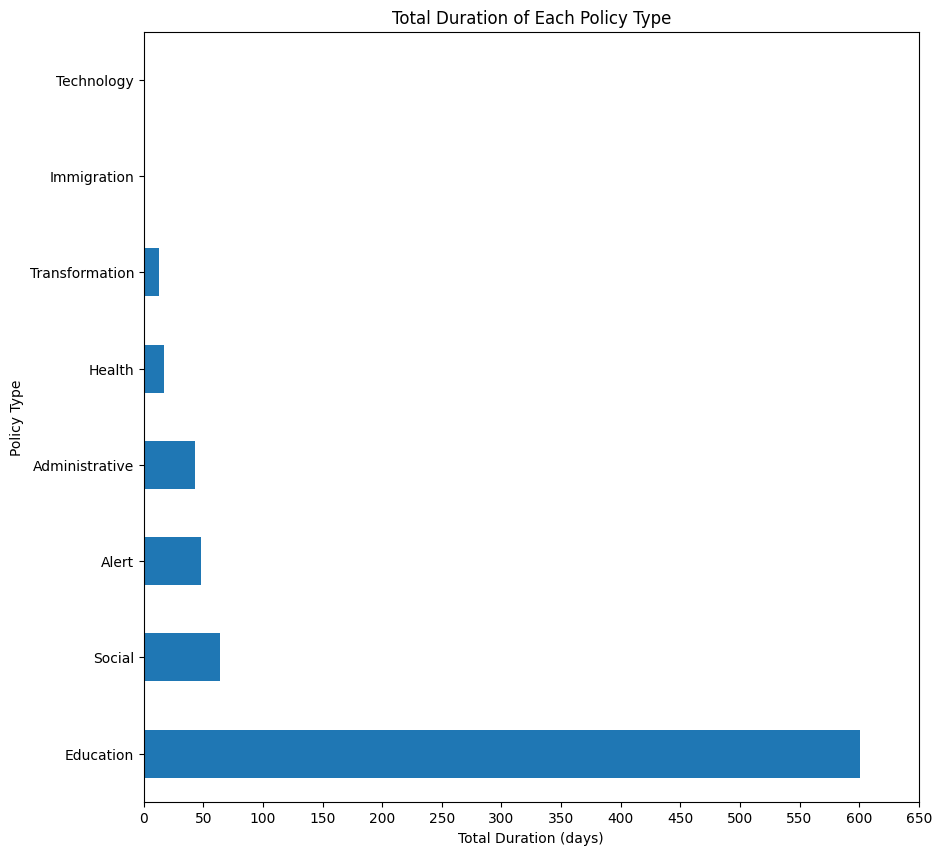

In [84]:
# Add a new column for the duration of each policy
policy['duration'] = policy['end_date'] - policy['start_date']

# Convert duration to number of days
policy['duration'] = policy['duration'].dt.days

# Group by policy type and calculate the total duration of each type
duration_by_type = policy.groupby('type')['duration'].sum().sort_values(ascending=False)

# Plot a bar chart
plt.figure(figsize=(10,10))
duration_by_type.plot(kind='barh')
plt.title('Total Duration of Each Policy Type')
plt.xlabel('Total Duration (days)')
plt.ylabel('Policy Type')
plt.xticks(range(0,700,50))
plt.show()


This visualization provides insights into the total duration of each government policy that has a duration greater than 1 day

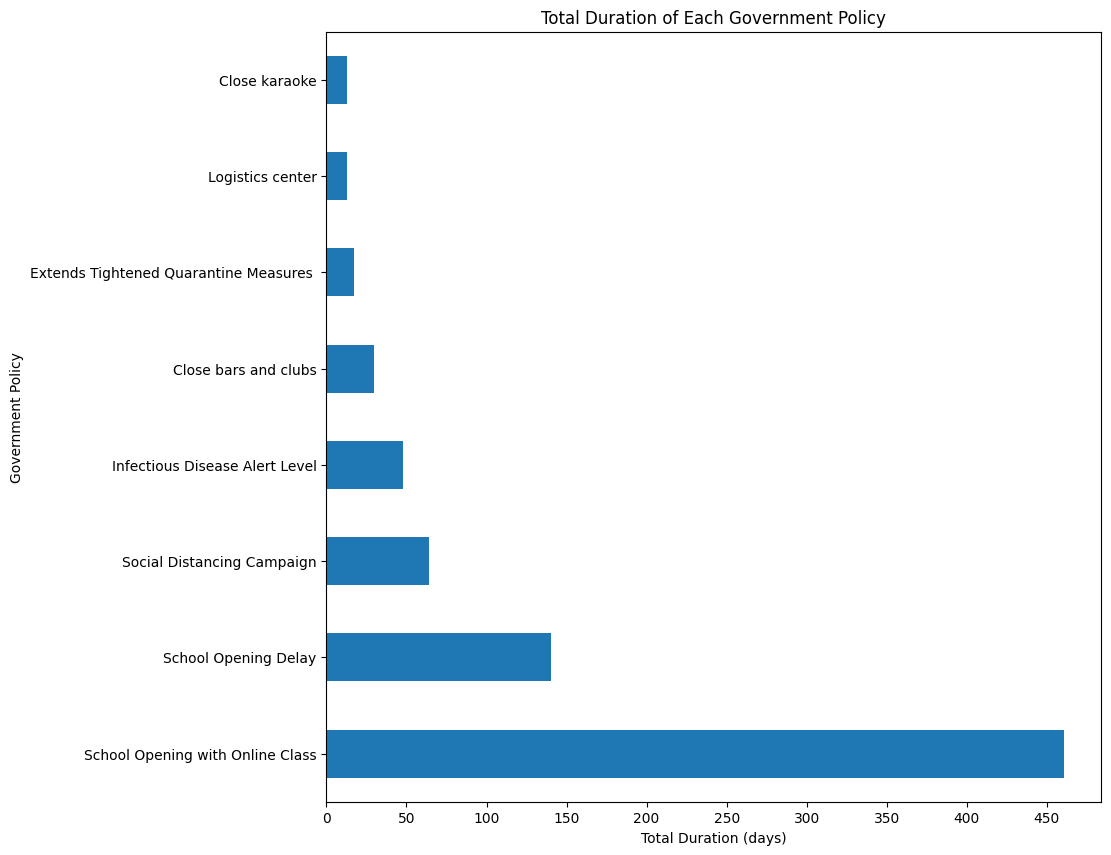

In [85]:
# Group by government policy and calculate the total duration of each
duration_by_gov_policy = policy.groupby('gov_policy')['duration'].sum().sort_values(ascending=False)
duration_by_gov_policy_more_than1 = duration_by_gov_policy[duration_by_gov_policy>1]
# Plot a bar chart
plt.figure(figsize=(10,10))
duration_by_gov_policy_more_than1.plot(kind='barh')
plt.title('Total Duration of Each Government Policy')
plt.xlabel('Total Duration (days)')
plt.ylabel('Government Policy')
plt.xticks(range(0,500,50))
plt.show()

# region

## Data Cleaning region

In [9]:
result_region = data_cleaning(region)
result_region

======== Data Overview ========

Shape of data: (244, 12)

Columns in data: 
['code', 'province', 'city', 'latitude', 'longitude', 'elementary_school_count', 'kindergarten_count', 'university_count', 'academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio', 'nursing_home_count']

======== Data Info ========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code                      244 non-null    int64  
 1   province                  244 non-null    object 
 2   city                      244 non-null    object 
 3   latitude                  244 non-null    float64
 4   longitude                 244 non-null    float64
 5   elementary_school_count   244 non-null    int64  
 6   kindergarten_count        244 non-null    int64  
 7   university_count          244 non-null    int64  
 8   academy_ratio        

In [10]:
region.set_index('code',inplace=True)

## Visualization region

This visualization provides insights into the counts of the specified columns for the top 10 provinces.

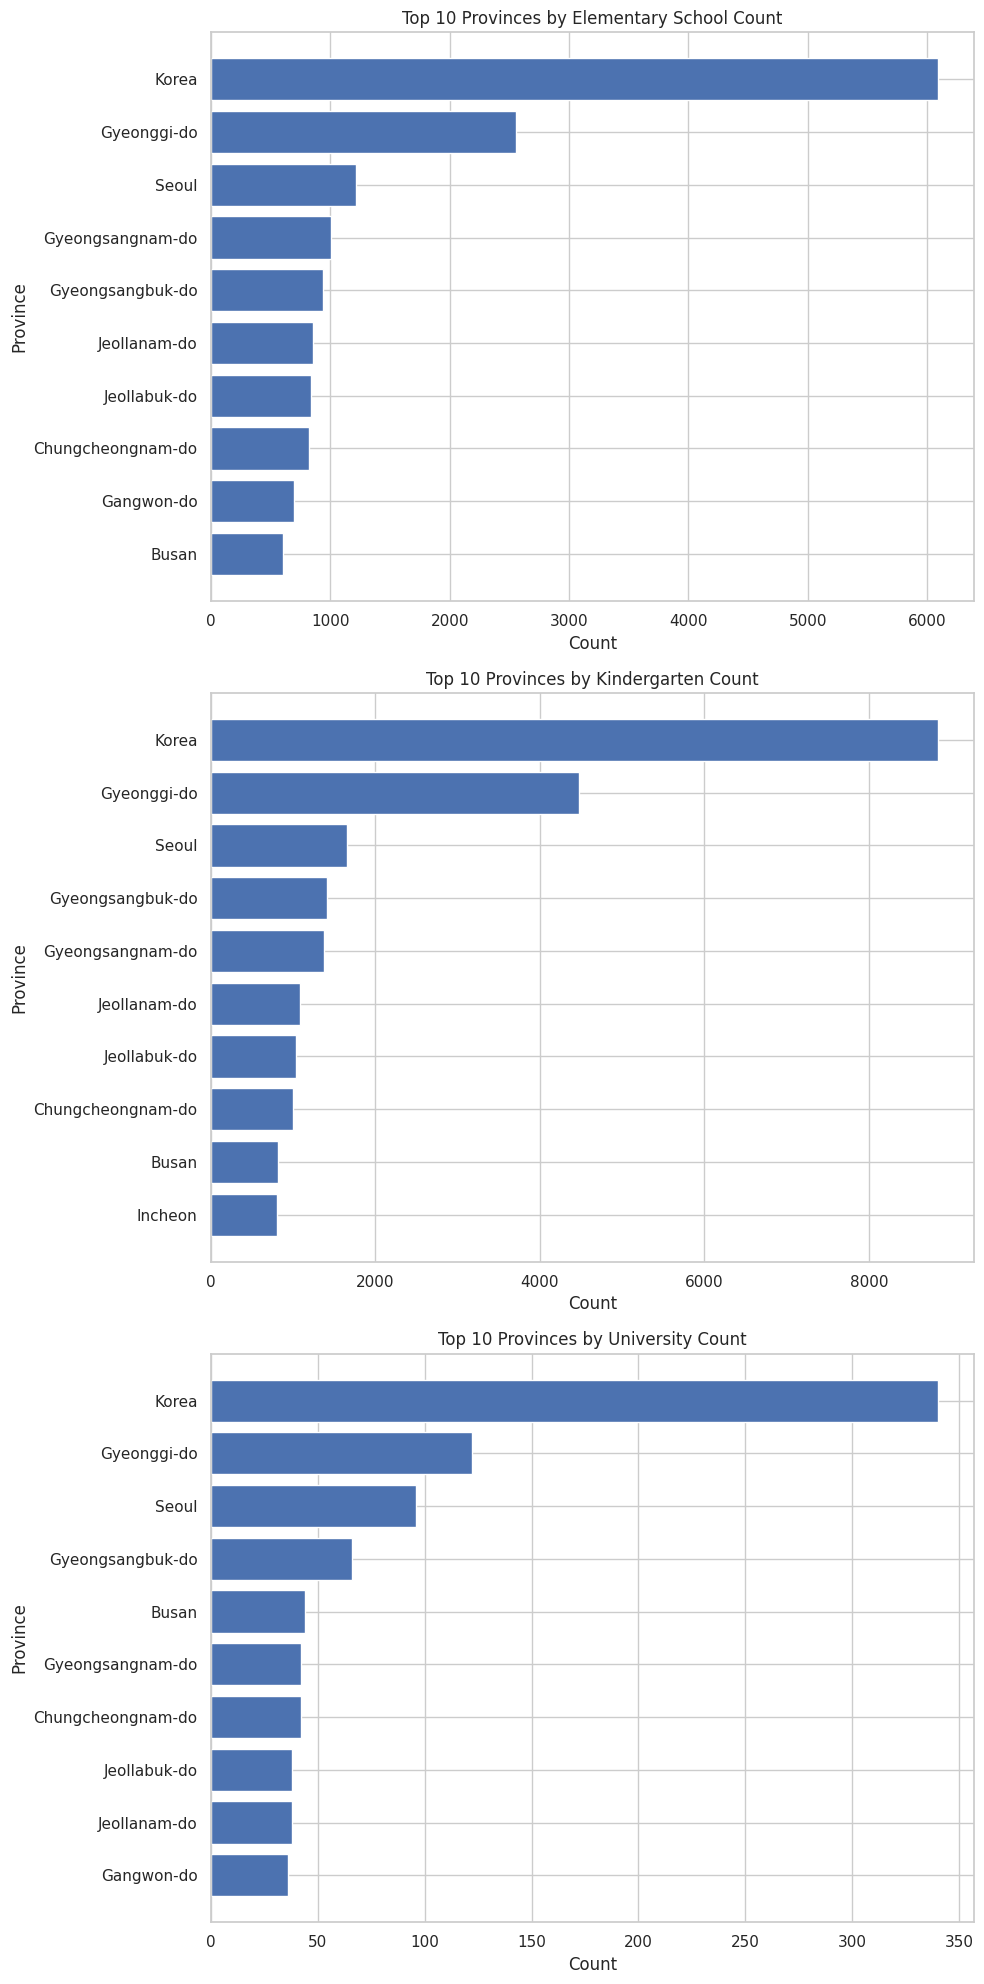

In [11]:
# Create a list of the columns you're interested in
columns = ['elementary_school_count', 'kindergarten_count', 'university_count']

# Create a new figure with three subplots, one for each count. The subplots are arranged vertically.
fig, axes = plt.subplots(nrows=3, figsize=(10, 20))

# For each column and subplot...
for col, ax in zip(columns, axes):
    # Group the 'region' dataframe by 'province' and sum the current column for each group
    # Then sort the resulting dataframe by 'count' in descending order and keep the top 10 provinces
    top_10_provinces = (region.groupby('province')[col].sum()
                        .reset_index(name='count')
                        .sort_values('count', ascending=False)
                        .head(10))

    # Create a horizontal bar plot on the current subplot
    ax.barh(y=top_10_provinces['province'], width=top_10_provinces['count'])

    # Invert the y-axis to display the province with the highest count at the top
    ax.invert_yaxis()

    # Set the title and labels for the current subplot
    ax.set_title(f'Top 10 Provinces by {col.replace("_", " ").title()}')
    ax.set_xlabel('Count')
    ax.set_ylabel('Province')

# Improve layout
plt.tight_layout()

# Show the plots
plt.show()


This visualization provides a geographical representation of the counts of different educational institutions in the region DataFrame. The size of the circle markers reflects the magnitude of the counts, with larger circles representing higher counts. The blue circles represent elementary schools, red circles represent kindergartens, and green circles represent universities. It allows for a visual understanding of the spatial distribution and relative densities of these educational institutions.

In [89]:
# Create a map centered at an arbitrary location
m = folium.Map(location=[37.5665, 126.9780], zoom_start=7)

# Add points to the map
for idx, row in region.iterrows():
    # Check if latitude and longitude are not null
    if not pd.isnull(row['latitude']) and not pd.isnull(row['longitude']):
        # Add circle markers for each count
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=row['elementary_school_count']/100,  # Scale down the value to an appropriate radius size
            color="blue",
            fill=True,
            fill_color="blue",
        ).add_to(m)

        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=row['kindergarten_count']/100,  # Scale down the value to an appropriate radius size
            color="red",
            fill=True,
            fill_color="red",
        ).add_to(m)

        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=row['university_count']/100,  # Scale down the value to an appropriate radius size
            color="green",
            fill=True,
            fill_color="green",
        ).add_to(m)

# Display the map
m

This visualization provides insights into the total academy ratio for each province

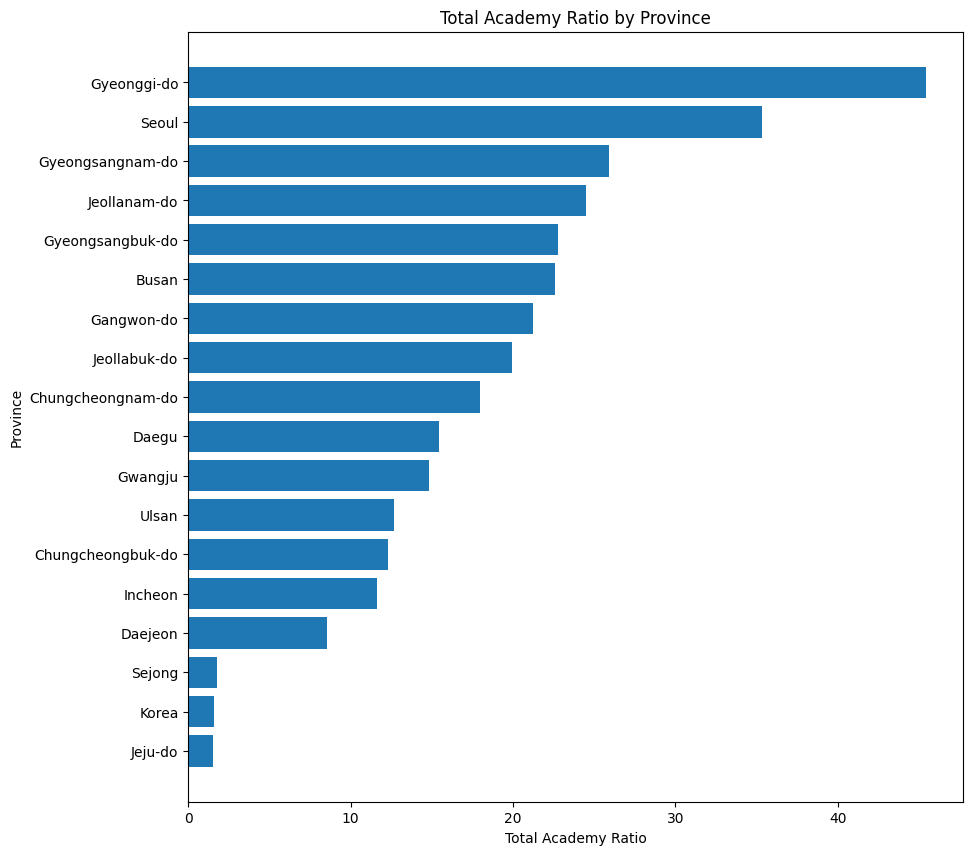

In [92]:
# Group by 'province' and sum 'academy_ratio' for each group
academy_ratio_by_province = region.groupby('province')['academy_ratio'].sum().reset_index(name='total_academy_ratio')

# Sort the data for better visualization
academy_ratio_by_province_sorted = academy_ratio_by_province.sort_values('total_academy_ratio', ascending=False)

# Create a bar plot
plt.figure(figsize=(10,10))
plt.barh(y=academy_ratio_by_province_sorted['province'], width=academy_ratio_by_province_sorted['total_academy_ratio'])
plt.gca().invert_yaxis()
plt.title('Total Academy Ratio by Province')
plt.xlabel('Total Academy Ratio')
plt.ylabel('Province')
plt.show()

This visualization provides a comprehensive overview of the total counts of different types of educational institutions (elementary schools, kindergartens, universities) and the mean academy ratio per province.

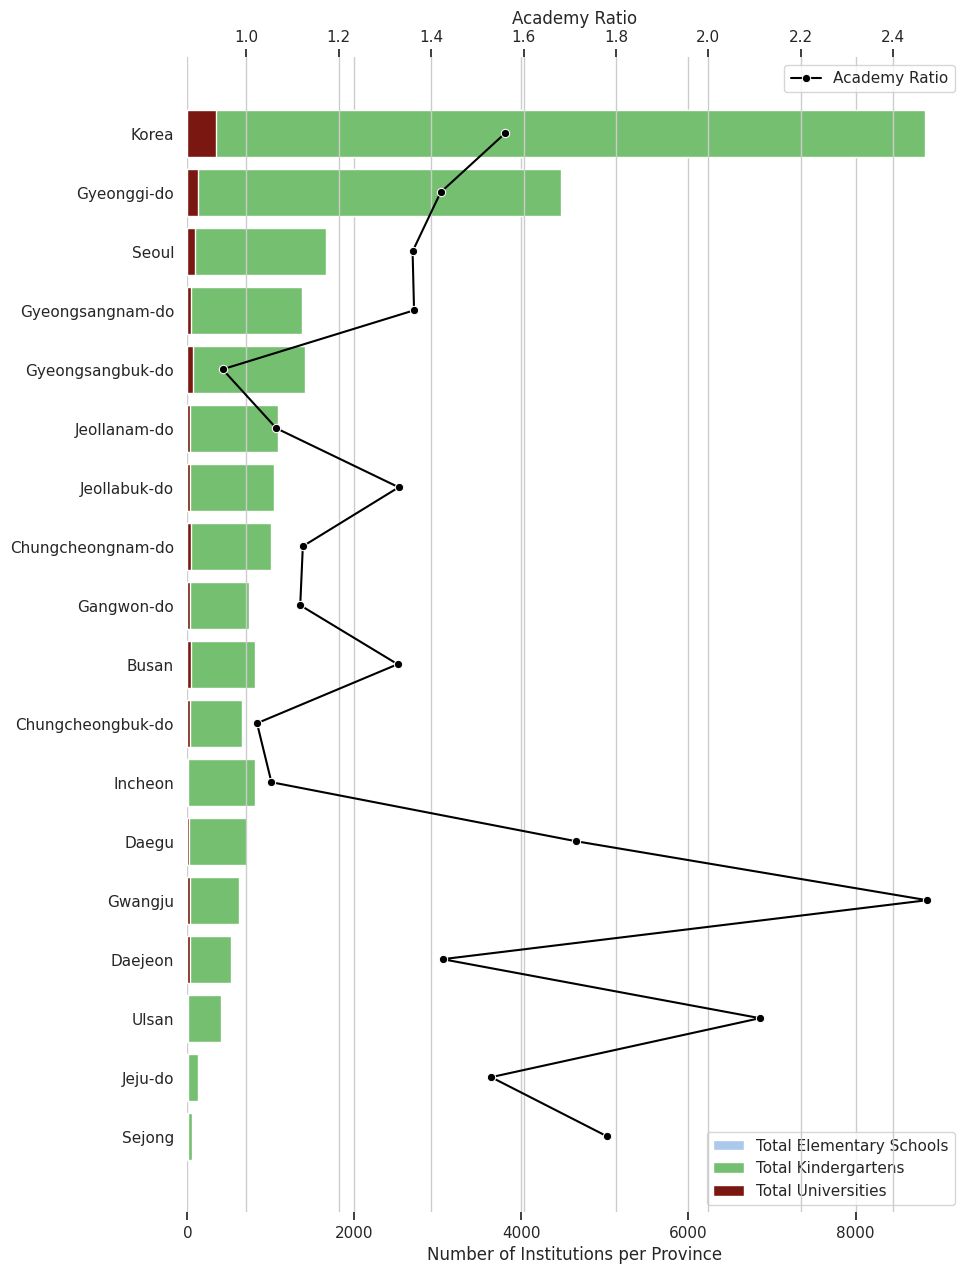

In [93]:
# Compute total counts for each category per province
total_elementary_by_province = region.groupby('province')['elementary_school_count'].sum().reset_index(name='total_elementary')
total_kindergarten_by_province = region.groupby('province')['kindergarten_count'].sum().reset_index(name='total_kindergarten')
total_university_by_province = region.groupby('province')['university_count'].sum().reset_index(name='total_university')
academy_ratio_by_province = region.groupby('province')['academy_ratio'].mean().reset_index(name='academy_ratio')

# Join the four dataframes on the 'province' column
joined_data = pd.merge(total_elementary_by_province, total_kindergarten_by_province, on='province')
joined_data = pd.merge(joined_data, total_university_by_province, on='province')
joined_data = pd.merge(joined_data, academy_ratio_by_province, on='province')

# Sort by total elementary schools for better visualization
joined_data.sort_values('total_elementary', ascending=False, inplace=True)

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

# Plot the total counts for each category
sns.set_color_codes("pastel")
sns.barplot(x="total_elementary", y="province", data=joined_data, label="Total Elementary Schools", color="b")

sns.set_color_codes("muted")
sns.barplot(x="total_kindergarten", y="province", data=joined_data, label="Total Kindergartens", color="g")

sns.set_color_codes("dark")
sns.barplot(x="total_university", y="province", data=joined_data, label="Total Universities", color="r")

# Create a secondary y-axis for the academy_ratio
ax2 = ax.twiny()
sns.lineplot(x="academy_ratio", y="province", data=joined_data, color="black", marker="o", sort=False, ax=ax2, label="Academy Ratio")

# Add a legend and informative axis label
ax.legend(loc="lower right", frameon=True)
ax.set(ylabel="", xlabel="Number of Institutions per Province")

ax2.legend(loc="upper right", frameon=True)
ax2.set(xlabel="Academy Ratio")

sns.despine(left=True, bottom=True)

plt.show()


The heatmap provides a visual representation of the correlations between the selected columns. Each cell in the heatmap represents the correlation coefficient between two variables. The color scale and annotations help to interpret the strength and direction of the correlations. Positive correlations are indicated by warmer colors, while negative correlations are indicated by cooler colors. The annotations provide the actual correlation values.

<Axes: >

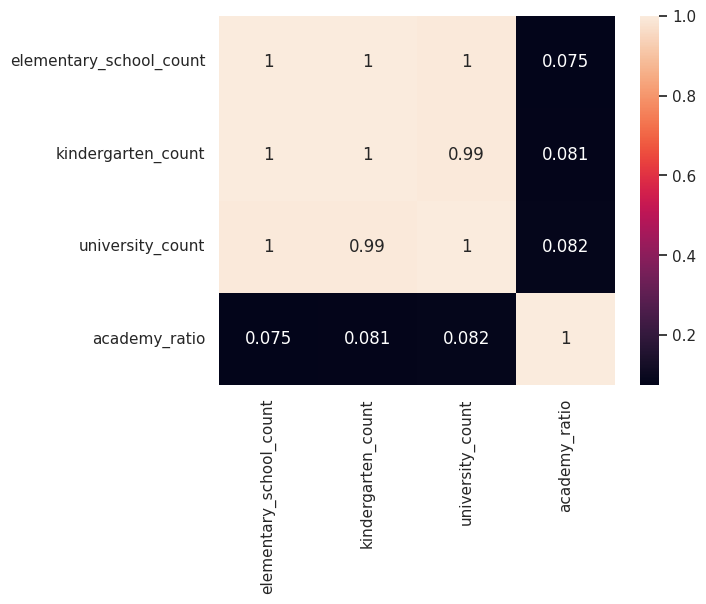

In [94]:
# Select the relevant columns
data = region[['elementary_school_count', 'kindergarten_count', 'university_count','academy_ratio']]

# Compute the correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)

This visualization provides an overview of the total count of nursing homes and the average elderly alone ratio and elderly population ratio per province. The bar plot allows for easy comparison of the total counts across provinces, while the line plots provide insights into the ratios.

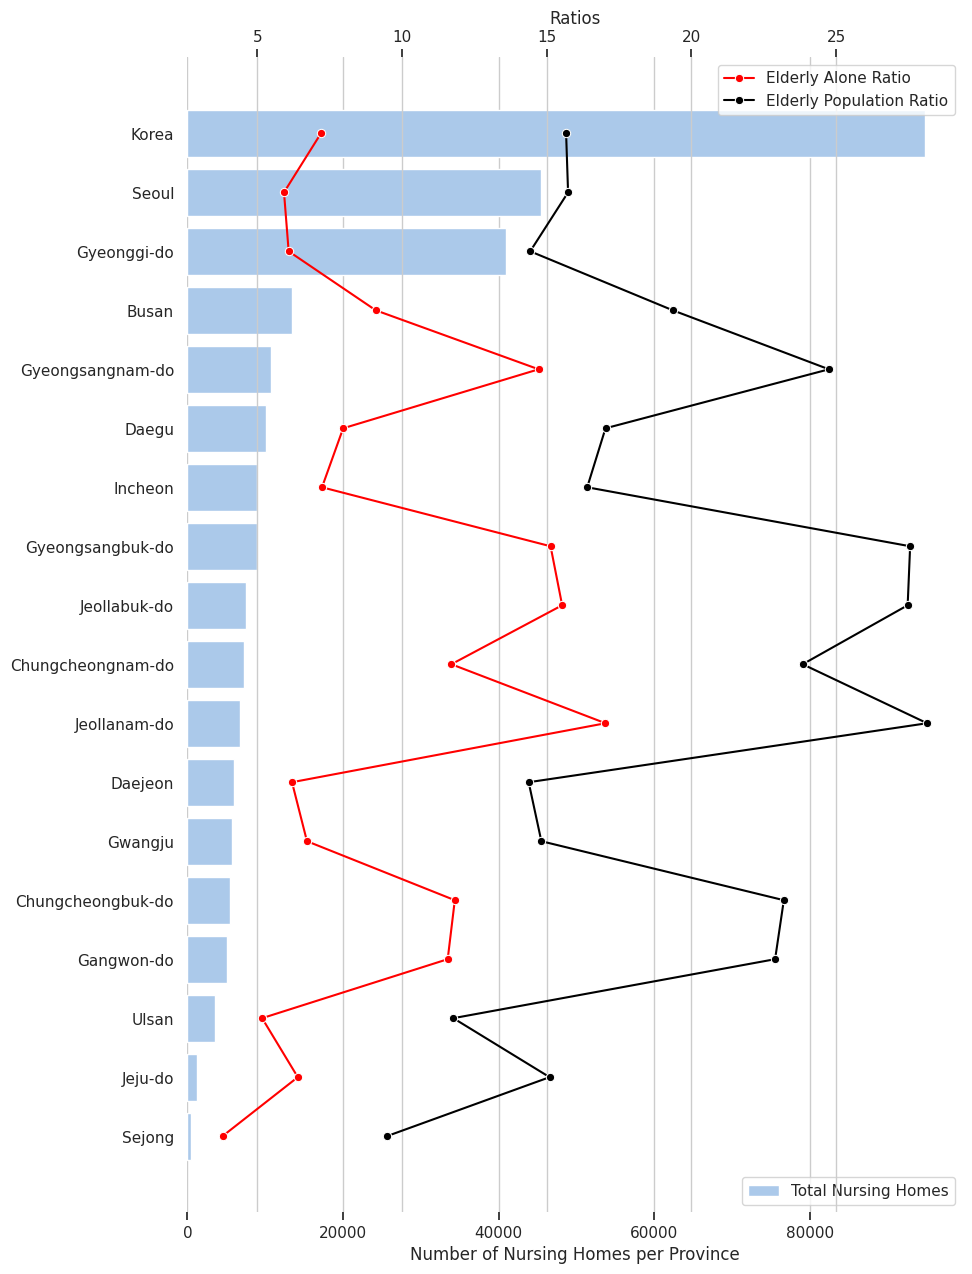

In [6]:
# Compute total count for nursing homes and average elderly alone ratio and elderly population ratio per province
total_nursing_home_by_province = region.groupby('province')['nursing_home_count'].sum().reset_index(name='total_nursing_home')
elderly_alone_ratio_by_province = region.groupby('province')['elderly_alone_ratio'].mean().reset_index(name='elderly_alone_ratio')
elderly_population_ratio_by_province = region.groupby('province')['elderly_population_ratio'].mean().reset_index(name='elderly_population_ratio')

# Join the three dataframes on the 'province' column
joined_data = pd.merge(total_nursing_home_by_province, elderly_alone_ratio_by_province, on='province')
joined_data = pd.merge(joined_data, elderly_population_ratio_by_province, on='province')

# Sort by total nursing homes for better visualization
joined_data.sort_values('total_nursing_home', ascending=False, inplace=True)

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

# Plot the total count for nursing homes
sns.set_color_codes("pastel")
sns.barplot(x="total_nursing_home", y="province", data=joined_data, label="Total Nursing Homes", color="b")

# Create a secondary y-axis for the elderly alone ratio and elderly population ratio
ax2 = ax.twiny()
sns.lineplot(x="elderly_alone_ratio", y="province", data=joined_data, color="red", marker="o", sort=False, ax=ax2, label="Elderly Alone Ratio")
sns.lineplot(x="elderly_population_ratio", y="province", data=joined_data, color="black", marker="o", sort=False, ax=ax2, label="Elderly Population Ratio")

# Add a legend and informative axis label
ax.legend(loc="lower right", frameon=True)
ax.set(ylabel="", xlabel="Number of Nursing Homes per Province")

ax2.legend(loc="upper right", frameon=True)
ax2.set(xlabel="Ratios")

sns.despine(left=True, bottom=True)

plt.show()


<Axes: >

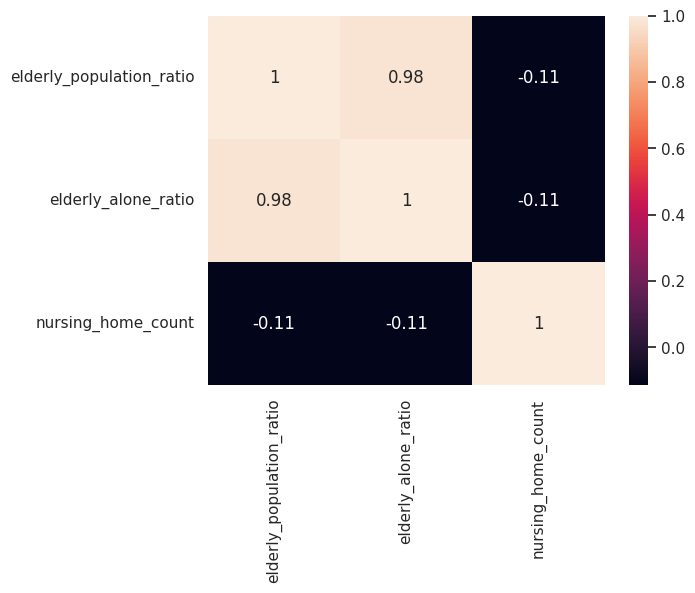

In [7]:
# Select the relevant columns
data = region[['elderly_population_ratio', 'elderly_alone_ratio', 'nursing_home_count']]

# Compute the correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)


The resulting map displays circle markers at the specified locations, representing the nursing home count for each region. The size of each circle marker is scaled down based on the nursing home count, allowing for a visual comparison of the nursing home distribution across regions. The blue color indicates the presence of nursing homes in the respective regions.

In [8]:
# Create a map centered at an arbitrary location
m = folium.Map(location=[37.5665, 126.9780], zoom_start=7)

# Add points to the map
for idx, row in region.iterrows():
    # Check if latitude and longitude are not null
    if not pd.isnull(row['latitude']) and not pd.isnull(row['longitude']):
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=row['nursing_home_count']/1000,  # Scale down the value to an appropriate radius size
            color="blue",
            fill=True,
            fill_color="blue",
            ).add_to(m)
# Display the map
m


# searchtrend

## Data Cleaning searchtrend

In [12]:
result_searchtrend = data_cleaning(searchtrend)
result_searchtrend

======== Data Overview ========

Shape of data: (1642, 5)

Columns in data: 
['date', 'cold', 'flu', 'pneumonia', 'coronavirus']

======== Data Info ========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1642 non-null   object 
 1   cold         1642 non-null   float64
 2   flu          1642 non-null   float64
 3   pneumonia    1642 non-null   float64
 4   coronavirus  1642 non-null   float64
dtypes: float64(4), object(1)
memory usage: 64.3+ KB

======== Data Description ========
              date         cold          flu    pneumonia  coronavirus
count         1642  1642.000000  1642.000000  1642.000000  1642.000000
unique        1642          NaN          NaN          NaN          NaN
top     2016-01-01          NaN          NaN          NaN          NaN
freq             1          NaN          NaN          NaN          Na

In [13]:
searchtrend.head()

date     cold      flu  pneumonia  coronavirus
0  2016-01-01  0.11663  0.05590    0.15726      0.00736
1  2016-01-02  0.13372  0.17135    0.20826      0.00890
2  2016-01-03  0.14917  0.22317    0.19326      0.00845
3  2016-01-04  0.17463  0.18626    0.29008      0.01145
4  2016-01-05  0.17226  0.15072    0.24562      0.01381

## Visualization searchtrend

The resulting line plot visualizes the search volumes over time for different search terms ('cold', 'flu', 'pneumonia', 'coronavirus'). Each search term is represented by a different line, allowing for a comparison of the search volumes over time. The x-axis represents the dates, and the y-axis represents the search volume. The plot title and labels provide additional context to understand the visualization.

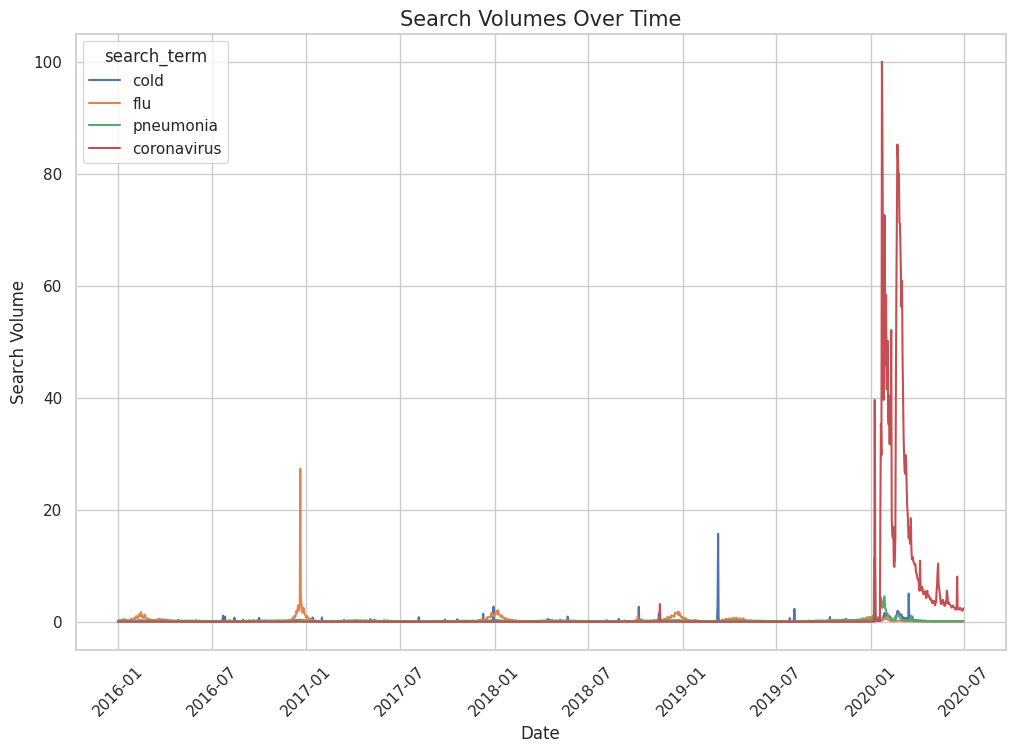

In [14]:

# Reshape the DataFrame
df_melt = searchtrend.melt(id_vars='date', value_vars=['cold', 'flu', 'pneumonia', 'coronavirus'], var_name='search_term', value_name='volume')

# Convert the 'date' column to datetime format
df_melt['date'] = pd.to_datetime(df_melt['date'])

# Create a figure and set of subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Use Seaborn to create a lineplot
sns.lineplot(x='date', y='volume', hue='search_term', data=df_melt)

# Set plot title and labels
ax.set_title('Search Volumes Over Time', fontsize=15)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Search Volume', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Seoulfloating

## Data Cleaning seoulfloating

In [15]:
seoulfloating.head()

date  hour  birth_year     sex province           city  fp_num
0  2020-01-01     0          20  female    Seoul      Dobong-gu   19140
1  2020-01-01     0          20    male    Seoul      Dobong-gu   19950
2  2020-01-01     0          20  female    Seoul  Dongdaemun-gu   25450
3  2020-01-01     0          20    male    Seoul  Dongdaemun-gu   27050
4  2020-01-01     0          20  female    Seoul     Dongjag-gu   28880

In [16]:
result_seoulfloating = data_cleaning(seoulfloating)
result_seoulfloating

======== Data Overview ========

Shape of data: (1084800, 7)

Columns in data: 
['date', 'hour', 'birth_year', 'sex', 'province', 'city', 'fp_num']

======== Data Info ========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084800 entries, 0 to 1084799
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   date        1084800 non-null  object
 1   hour        1084800 non-null  int64 
 2   birth_year  1084800 non-null  int64 
 3   sex         1084800 non-null  object
 4   province    1084800 non-null  object
 5   city        1084800 non-null  object
 6   fp_num      1084800 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 57.9+ MB

======== Data Description ========
              date          hour    birth_year      sex province       city  \
count      1084800  1.084800e+06  1.084800e+06  1084800  1084800    1084800   
unique         151           NaN           NaN        2        1         25   
top     2

KeyboardInterrupt: ignored

In [17]:
seoulfloating['date'] = pd.to_datetime(seoulfloating['date'], errors='coerce')

In [18]:
seoulfloating.set_index('date',inplace=True)

In [19]:
seoulfloating.head()

hour  birth_year     sex province           city  fp_num
date                                                                
2020-01-01     0          20  female    Seoul      Dobong-gu   19140
2020-01-01     0          20    male    Seoul      Dobong-gu   19950
2020-01-01     0          20  female    Seoul  Dongdaemun-gu   25450
2020-01-01     0          20    male    Seoul  Dongdaemun-gu   27050
2020-01-01     0          20  female    Seoul     Dongjag-gu   28880

In [20]:
seoulfloating.resample('W').sum()

<ipython-input-20-a33ade57cd70>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seoulfloating.resample('W').sum()


hour  birth_year      fp_num
date                                      
2020-01-05  414000     1620000   991816400
2020-01-12  579600     2268000  1412750590
2020-01-19  579600     2268000  1408781130
2020-01-26  579600     2268000  1323341710
2020-02-02  579600     2268000  1381499610
2020-02-09  579600     2268000  1387818200
2020-02-16  579600     2268000  1385614380
2020-02-23  579600     2268000  1561186800
2020-03-01  579600     2268000  1375153010
2020-03-08  496800     1944000  1179988300
2020-03-15  579600     2268000  1334714030
2020-03-22  579600     2268000  1366522840
2020-03-29  579600     2268000  1365059200
2020-04-05  579600     2268000  1377671780
2020-04-12  579600     2268000  1378686620
2020-04-19  579600     2268000  1370192640
2020-04-26  579600     2268000  1377518340
2020-05-03  579600     2268000  1331063110
2020-05-10  579600     2268000  1372086310
2020-05-17  579600     2268000  1384496080
2020-05-24  576000     2254500  1370708460
2020-05-31  537600     2173500  1316102350

## Visualization seoulfloating

The resulting figure displays two pie charts side by side, one for the male gender and one for the female gender. Each pie chart represents the distribution of birth years within the respective gender group.

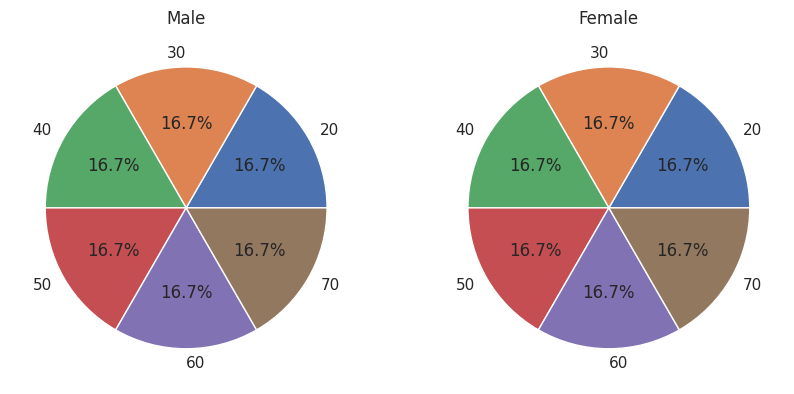

In [22]:
# First, let's group the data as you've done before
birth_year_and_sex = seoulfloating.groupby(['sex','birth_year']).size().reset_index(name="count")

# Separate the data into two DataFrames, one for each gender
birth_year_and_sex_male = birth_year_and_sex[birth_year_and_sex['sex'] == 'male']
birth_year_and_sex_female = birth_year_and_sex[birth_year_and_sex['sex'] == 'female']

# Now we can create the pie charts
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Create the male pie chart
axs[0].pie(birth_year_and_sex_male['count'], labels=birth_year_and_sex_male['birth_year'], autopct='%1.1f%%')
axs[0].set_title('Male')

# Create the female pie chart
axs[1].pie(birth_year_and_sex_female['count'], labels=birth_year_and_sex_female['birth_year'], autopct='%1.1f%%')
axs[1].set_title('Female')

# Show the plots
plt.show()


The resulting line plot shows the trend of the sum of 'fp_num' over time, with the x-axis representing the dates and the y-axis representing the sum of 'fp_num'. This plot allows you to observe the overall pattern and fluctuations in the daily sum of 'fp_num' over the given time period.

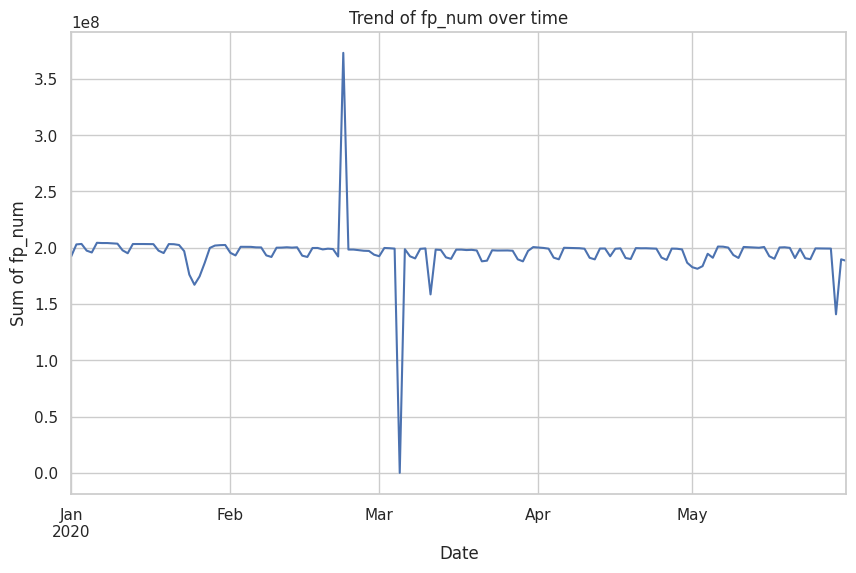

In [23]:
# Resample 'fp_num' by day and calculate the sum for each day
daily_fp_num = seoulfloating['fp_num'].resample('D').sum()

# Create a line plot of 'fp_num' over time
daily_fp_num.plot(kind='line', figsize=(10, 6))

plt.title('Trend of fp_num over time')
plt.ylabel('Sum of fp_num')
plt.xlabel('Date')

plt.show()


The resulting line plot shows the average 'fp_num' for each hour of the day, with the x-axis representing the hour values and the y-axis representing the average 'fp_num' values. This plot allows you to observe the variation in the average 'fp_num' throughout different hours of the day and identify any patterns or trends.

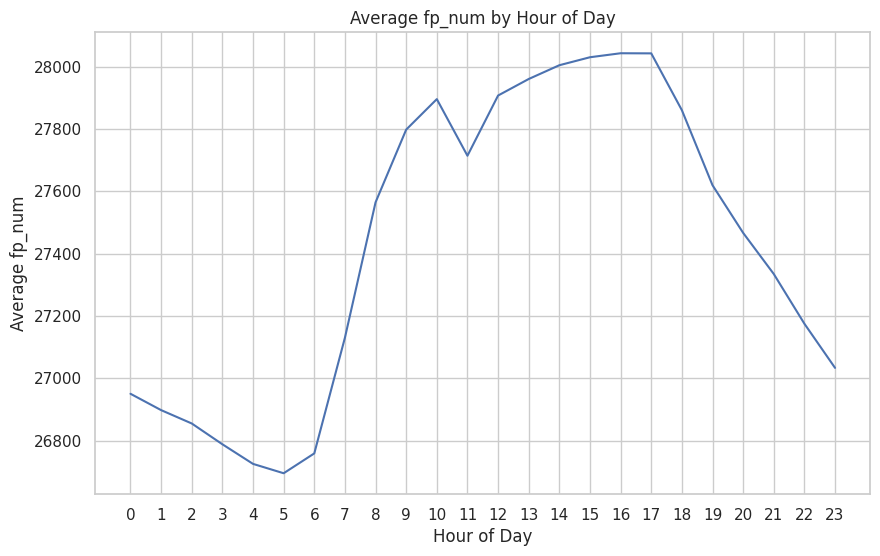

In [24]:
# Group by 'hour' and calculate the mean 'fp_num' for each hour
hourly_avg_fp_num = seoulfloating.groupby('hour')['fp_num'].mean()

# Create a line plot of average 'fp_num' by hour of the day
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_avg_fp_num.index, y=hourly_avg_fp_num.values)

plt.title('Average fp_num by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average fp_num')
plt.xticks(range(0,24,1))

plt.show()

In [25]:
weekly_date = seoulfloating.resample('W').sum()
city_fp_num = seoulfloating.groupby(['date','city'])['fp_num'].sum().reset_index(name='sum')
city_fp_num

<ipython-input-25-ef95b6d1f81a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_date = seoulfloating.resample('W').sum()


date             city       sum
0    2020-01-01        Dobong-gu   6285430
1    2020-01-01    Dongdaemun-gu   6918490
2    2020-01-01       Dongjag-gu   7669030
3    2020-01-01     Eunpyeong-gu   8780930
4    2020-01-01       Gangbuk-gu   6160610
...         ...              ...       ...
3770 2020-05-31     Seongdong-gu   5662070
3771 2020-05-31        Songpa-gu  12163070
3772 2020-05-31     Yangcheon-gu   8138610
3773 2020-05-31  Yeongdeungpo-gu   8290160
3774 2020-05-31       Yongsan-gu   4616900

[3775 rows x 3 columns]

The resulting line plot shows the trend of 'fp_num' over time for the top 5 cities with the highest sum of 'fp_num' values. Each city is represented by a separate line on the plot, with the x-axis representing the dates and the y-axis representing the sum of 'fp_num' values.

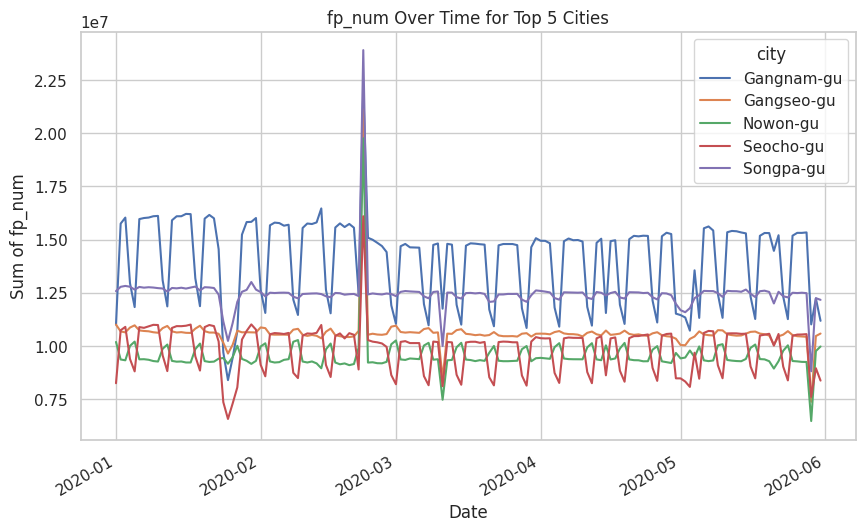

In [27]:
# Get top 5 cities with highest 'fp_num' sums
top_cities = city_fp_num.groupby('city')['sum'].sum().nlargest(5).index

# Filter city_fp_num for those cities
city_fp_num_top = city_fp_num[city_fp_num['city'].isin(top_cities)]

# Pivot the DataFrame for easy plotting
city_fp_num_pivot = city_fp_num_top.pivot(index='date', columns='city', values='sum')

# Plot
city_fp_num_pivot.plot(kind='line', figsize=(10,6))
plt.title('fp_num Over Time for Top 5 Cities')
plt.ylabel('Sum of fp_num')
plt.xlabel('Date')
plt.show()


The resulting bar chart shows the total sum of 'fp_num' for the top 5 cities with the highest 'fp_num' sums

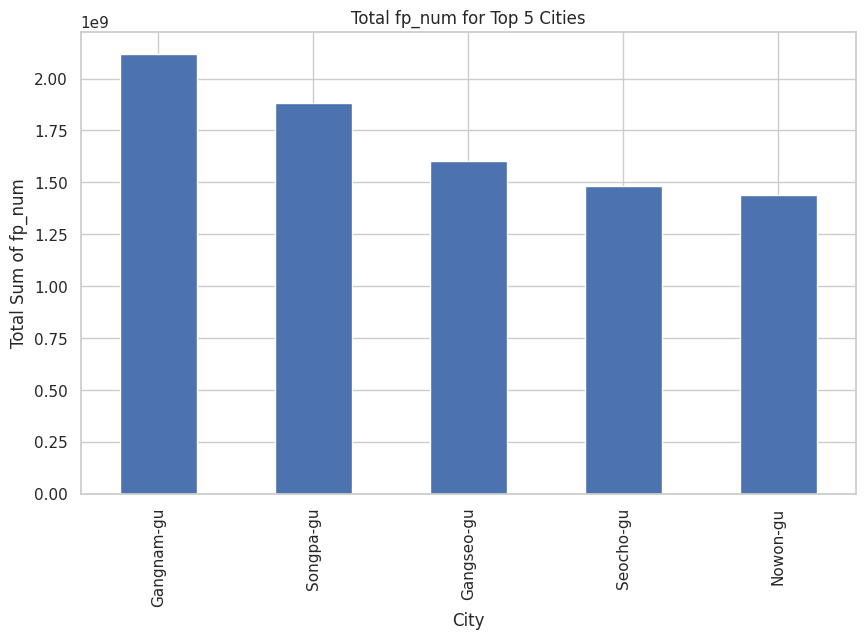

In [28]:
# Get top 5 cities with highest 'fp_num' sums
top_cities = city_fp_num.groupby('city')['sum'].sum().nlargest(5)

# Create bar chart
top_cities.plot(kind='bar', figsize=(10,6))
plt.title('Total fp_num for Top 5 Cities')
plt.ylabel('Total Sum of fp_num')
plt.xlabel('City')
plt.show()


# Time

## Data Cleaning time

In [29]:
result_time = data_cleaning(time)
result_time

======== Data Overview ========

Shape of data: (163, 7)

Columns in data: 
['date', 'time', 'test', 'negative', 'confirmed', 'released', 'deceased']

======== Data Info ========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       163 non-null    object
 1   time       163 non-null    int64 
 2   test       163 non-null    int64 
 3   negative   163 non-null    int64 
 4   confirmed  163 non-null    int64 
 5   released   163 non-null    int64 
 6   deceased   163 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 9.0+ KB

======== Data Description ========
              date        time          test      negative     confirmed  \
count          163  163.000000  1.630000e+02  1.630000e+02    163.000000   
unique         163         NaN           NaN           NaN           NaN   
top     2020-01-20         NaN           NaN        

In [30]:
time['date'] = pd.to_datetime(time['date'])

In [31]:
time.set_index('date',inplace=True)

In [32]:
time.dtypes

time         int64
test         int64
negative     int64
confirmed    int64
released     int64
deceased     int64
dtype: object

In [33]:
time.head()

time  test  negative  confirmed  released  deceased
date                                                           
2020-01-20    16     1         0          1         0         0
2020-01-21    16     1         0          1         0         0
2020-01-22    16     4         3          1         0         0
2020-01-23    16    22        21          1         0         0
2020-01-24    16    27        25          2         0         0

## Visualization time

The resulting line plot shows the number of tests conducted on a weekly basis over time. Each data point represents the sum of tests for a given week. The plot allows for the visualization of trends and patterns in the number of tests performed over time.

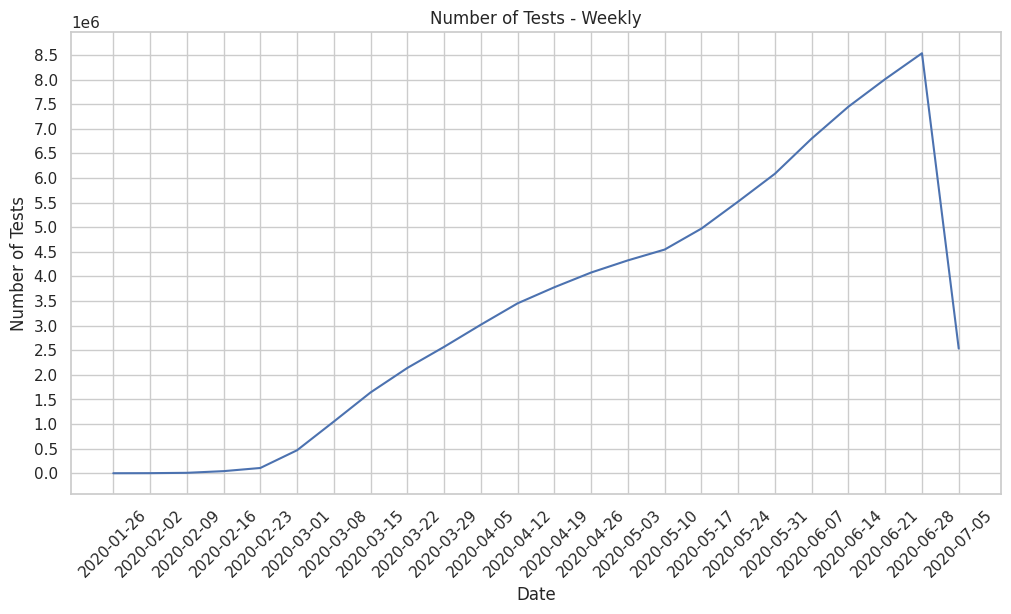

In [35]:
# Resample the data to a weekly frequency and calculate the sum of tests for each week
weekly_tests = time['test'].resample('W').sum()

# Create a line plot of the weekly tests
plt.figure(figsize=(12, 6))
plt.plot(weekly_tests.index, weekly_tests)

# Set plot title and labels
plt.title('Number of Tests - Weekly')
plt.xlabel('Date')
plt.ylabel('Number of Tests')
plt.yticks(range(0,9000000,500000))

# Generate weekly date labels
date_labels = pd.date_range(start=weekly_tests.index.min(), end=weekly_tests.index.max(), freq='W')

# Set x-ticks with weekly labels and rotate them for better visibility
plt.xticks(ticks=date_labels, labels=date_labels.strftime('%Y-%m-%d'), rotation=45)

# Show the plot
plt.show()


The resulting plot shows the number of tests, confirmed cases, and negative cases on a weekly basis over time. The line plot represents the tests and confirmed cases, while the bar plot represents the negative cases.

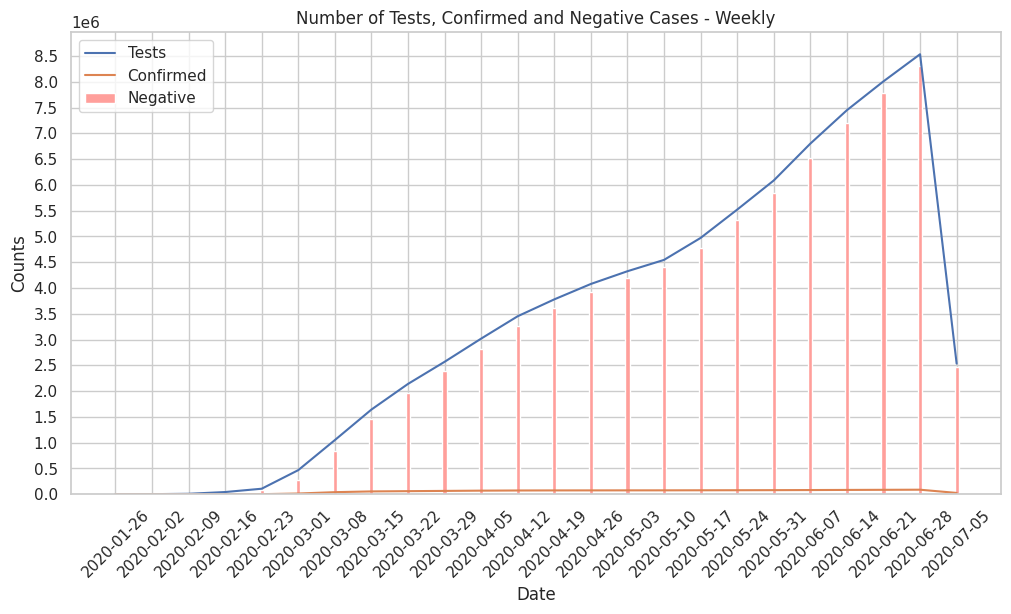

In [37]:
# Resample the data to a weekly frequency and calculate the sum of tests, negative and confirmed cases for each week
weekly_tests = time['test'].resample('W').sum()
weekly_negative = time['negative'].resample('W').sum()
weekly_confirmed = time['confirmed'].resample('W').sum()

plt.figure(figsize=(12, 6))

# Plot positive values (tests and confirmed cases)
plt.plot(weekly_tests.index, weekly_tests, label='Tests')
plt.plot(weekly_confirmed.index, weekly_confirmed, label='Confirmed')

# Plot negative values (negative cases)
plt.bar(weekly_negative.index, weekly_negative, color='r', label='Negative')

# Set plot title and labels
plt.title('Number of Tests, Confirmed and Negative Cases - Weekly')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.yticks(range(weekly_negative.min(), max(weekly_tests.max(), weekly_confirmed.max()), 500000)) # adjusted range

# Generate weekly date labels
date_labels = pd.date_range(start=weekly_tests.index.min(), end=weekly_tests.index.max(), freq='W')

# Set x-ticks with weekly labels and rotate them for better visibility
plt.xticks(ticks=date_labels, labels=date_labels.strftime('%Y-%m-%d'), rotation=45)

plt.legend()  # Show legend

# Show the plot
plt.show()


The resulting plot shows an overview of weekly cases, including the number of tests, confirmed cases, released cases, deceased cases, and negative cases. The line plots represent the tests, confirmed cases, released cases, and deceased cases, while the bar plot represents the negative cases. The plot provides a comprehensive view of the trends and comparisons between these different categories of data over time.

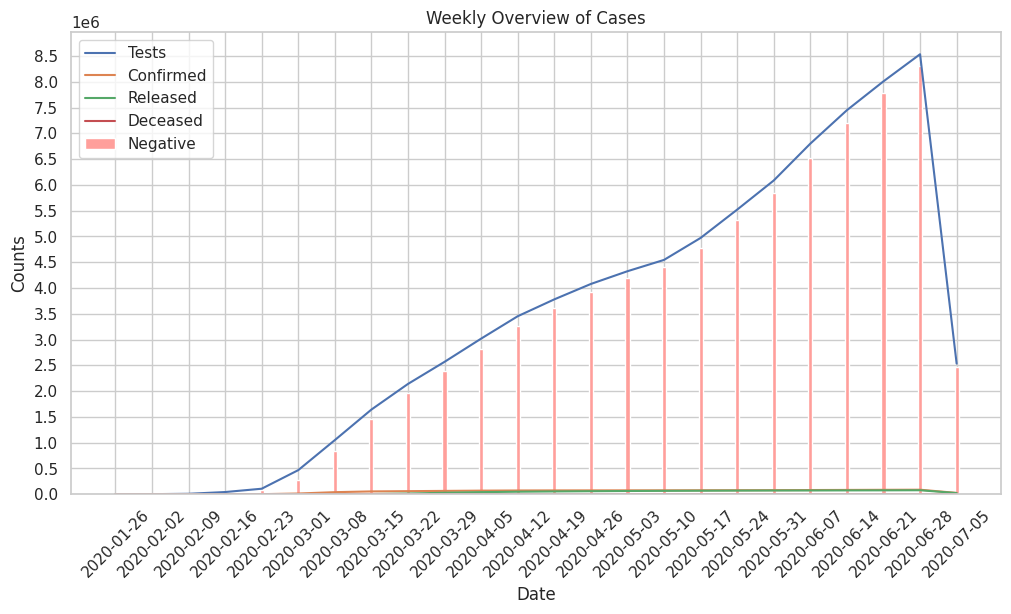

In [39]:
# Resample the data to a weekly frequency and calculate the sum of the desired columns for each week
weekly_tests = time['test'].resample('W').sum()
weekly_negative = time['negative'].resample('W').sum()
weekly_confirmed = time['confirmed'].resample('W').sum()
weekly_released = time['released'].resample('W').sum()
weekly_deceased = time['deceased'].resample('W').sum()

plt.figure(figsize=(12, 6))

# Plot positive values (tests, confirmed cases, released cases, and deceased cases)
plt.plot(weekly_tests.index, weekly_tests, label='Tests')
plt.plot(weekly_confirmed.index, weekly_confirmed, label='Confirmed')
plt.plot(weekly_released.index, weekly_released, label='Released')
plt.plot(weekly_deceased.index, weekly_deceased, label='Deceased')

# Plot negative values (negative cases)
plt.bar(weekly_negative.index, weekly_negative, color='r', label='Negative')

# Set plot title and labels
plt.title('Weekly Overview of Cases')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.yticks(range(weekly_negative.min(), max(weekly_tests.max(), weekly_confirmed.max(), weekly_released.max(), weekly_deceased.max()), 500000)) # adjusted range

# Generate weekly date labels
date_labels = pd.date_range(start=weekly_tests.index.min(), end=weekly_tests.index.max(), freq='W')

# Set x-ticks with weekly labels and rotate them for better visibility
plt.xticks(ticks=date_labels, labels=date_labels.strftime('%Y-%m-%d'), rotation=45)

plt.legend()  # Show legend

# Show the plot
plt.show()


# Time Age

## Data Cleaning Time Age

In [41]:
result_timeage = data_cleaning(timeage)
result_timeage

======== Data Overview ========

Shape of data: (1089, 5)

Columns in data: 
['date', 'time', 'age', 'confirmed', 'deceased']

======== Data Info ========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       1089 non-null   object
 1   time       1089 non-null   int64 
 2   age        1089 non-null   object
 3   confirmed  1089 non-null   int64 
 4   deceased   1089 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 42.7+ KB

======== Data Description ========
              date    time   age    confirmed     deceased
count         1089  1089.0  1089  1089.000000  1089.000000
unique         121     NaN     9          NaN          NaN
top     2020-03-02     NaN    0s          NaN          NaN
freq             9     NaN   121          NaN          NaN
mean           NaN     0.0   NaN  1158.129477    23.419651
std            NaN     0.

In [42]:
timeage.head()

date  time  age  confirmed  deceased
0  2020-03-02     0   0s         32         0
1  2020-03-02     0  10s        169         0
2  2020-03-02     0  20s       1235         0
3  2020-03-02     0  30s        506         1
4  2020-03-02     0  40s        633         1

In [43]:
timeage['date'] = pd.to_datetime(timeage['date'])

In [44]:
timeage.set_index('date',inplace=True)

In [45]:
if 'age' in timeage.columns:
    timeage['age'] = timeage['age'].apply(lambda x: int(str(x).replace('s','')) if str(x).endswith('s') else (x))

In [46]:
timeage.head()

time  age  confirmed  deceased
date                                      
2020-03-02     0    0         32         0
2020-03-02     0   10        169         0
2020-03-02     0   20       1235         0
2020-03-02     0   30        506         1
2020-03-02     0   40        633         1

In [47]:
timeage.dtypes

time         int64
age          int64
confirmed    int64
deceased     int64
dtype: object

## Visualization Time Age


The resulting bar chart shows the counts of confirmed and deceased cases for each age group. Each age group is represented by a pair of adjacent bars, with the 'Confirmed' bars shown in one color and the 'Deceased' bars shown in another color.

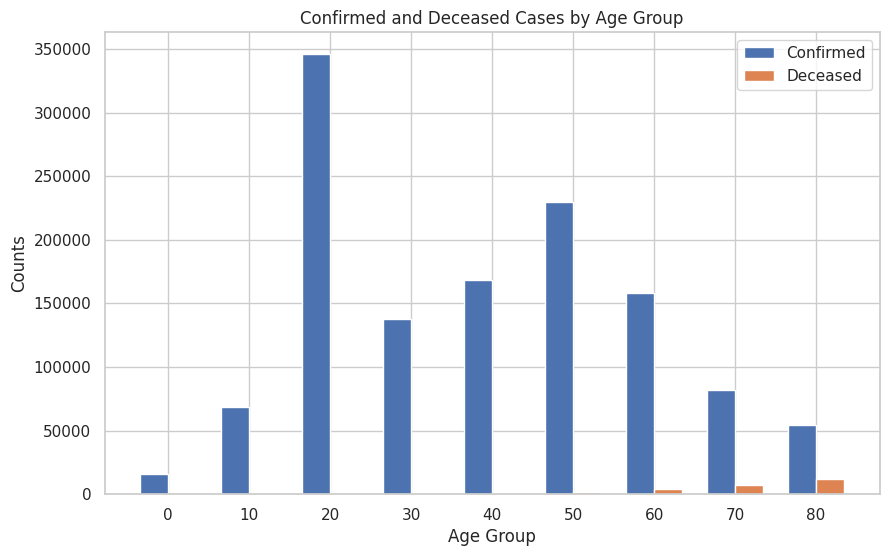

In [48]:
# Group by 'age_group' and calculate sums
grouped_data = timeage.groupby('age')[['confirmed', 'deceased']].sum().reset_index()

# Create bar chart
plt.figure(figsize=(10,6))
bar_width = 0.35
index = np.arange(len(grouped_data['age']))

plt.bar(index, grouped_data['confirmed'], bar_width, label='Confirmed')
plt.bar(index + bar_width, grouped_data['deceased'], bar_width, label='Deceased')

plt.xlabel('Age Group')
plt.ylabel('Counts')
plt.title('Confirmed and Deceased Cases by Age Group')
plt.xticks(index + bar_width/2, grouped_data['age'])  # place age group labels in the middle of the two bars

plt.legend()
plt.show()

The resulting line chart shows the counts of confirmed and deceased cases over time. The x-axis represents the dates, and the y-axis represents the counts. There are two lines on the chart, one for 'Confirmed' cases and one for 'Deceased' cases

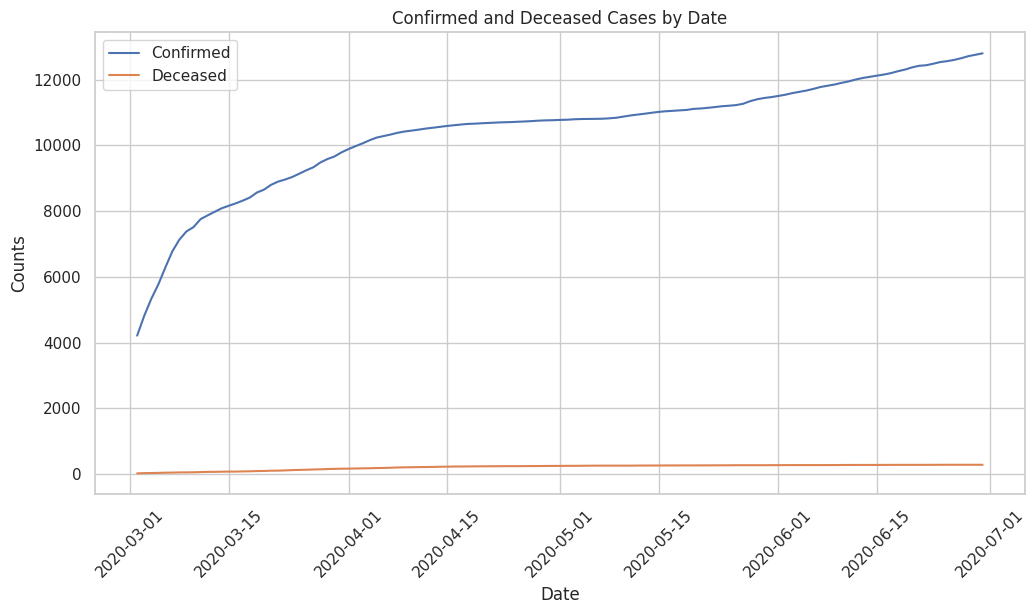

In [50]:
# Group by 'date' and calculate sums
grouped_data_by_date = timeage.groupby('date')[['confirmed', 'deceased']].sum().reset_index()

# Create line chart
plt.figure(figsize=(12,6))

plt.plot(grouped_data_by_date['date'], grouped_data_by_date['confirmed'], label='Confirmed')
plt.plot(grouped_data_by_date['date'], grouped_data_by_date['deceased'], label='Deceased')

plt.xlabel('Date')
plt.ylabel('Counts')
plt.title('Confirmed and Deceased Cases by Date')
plt.xticks(rotation=45)  # rotate x-axis labels for better visibility

plt.legend()
plt.show()


The resulting plot consists of multiple line charts, each representing the counts of confirmed and deceased cases for a specific age group over time. Each subplot has its own y-axis scale, but they all share the same x-axis.

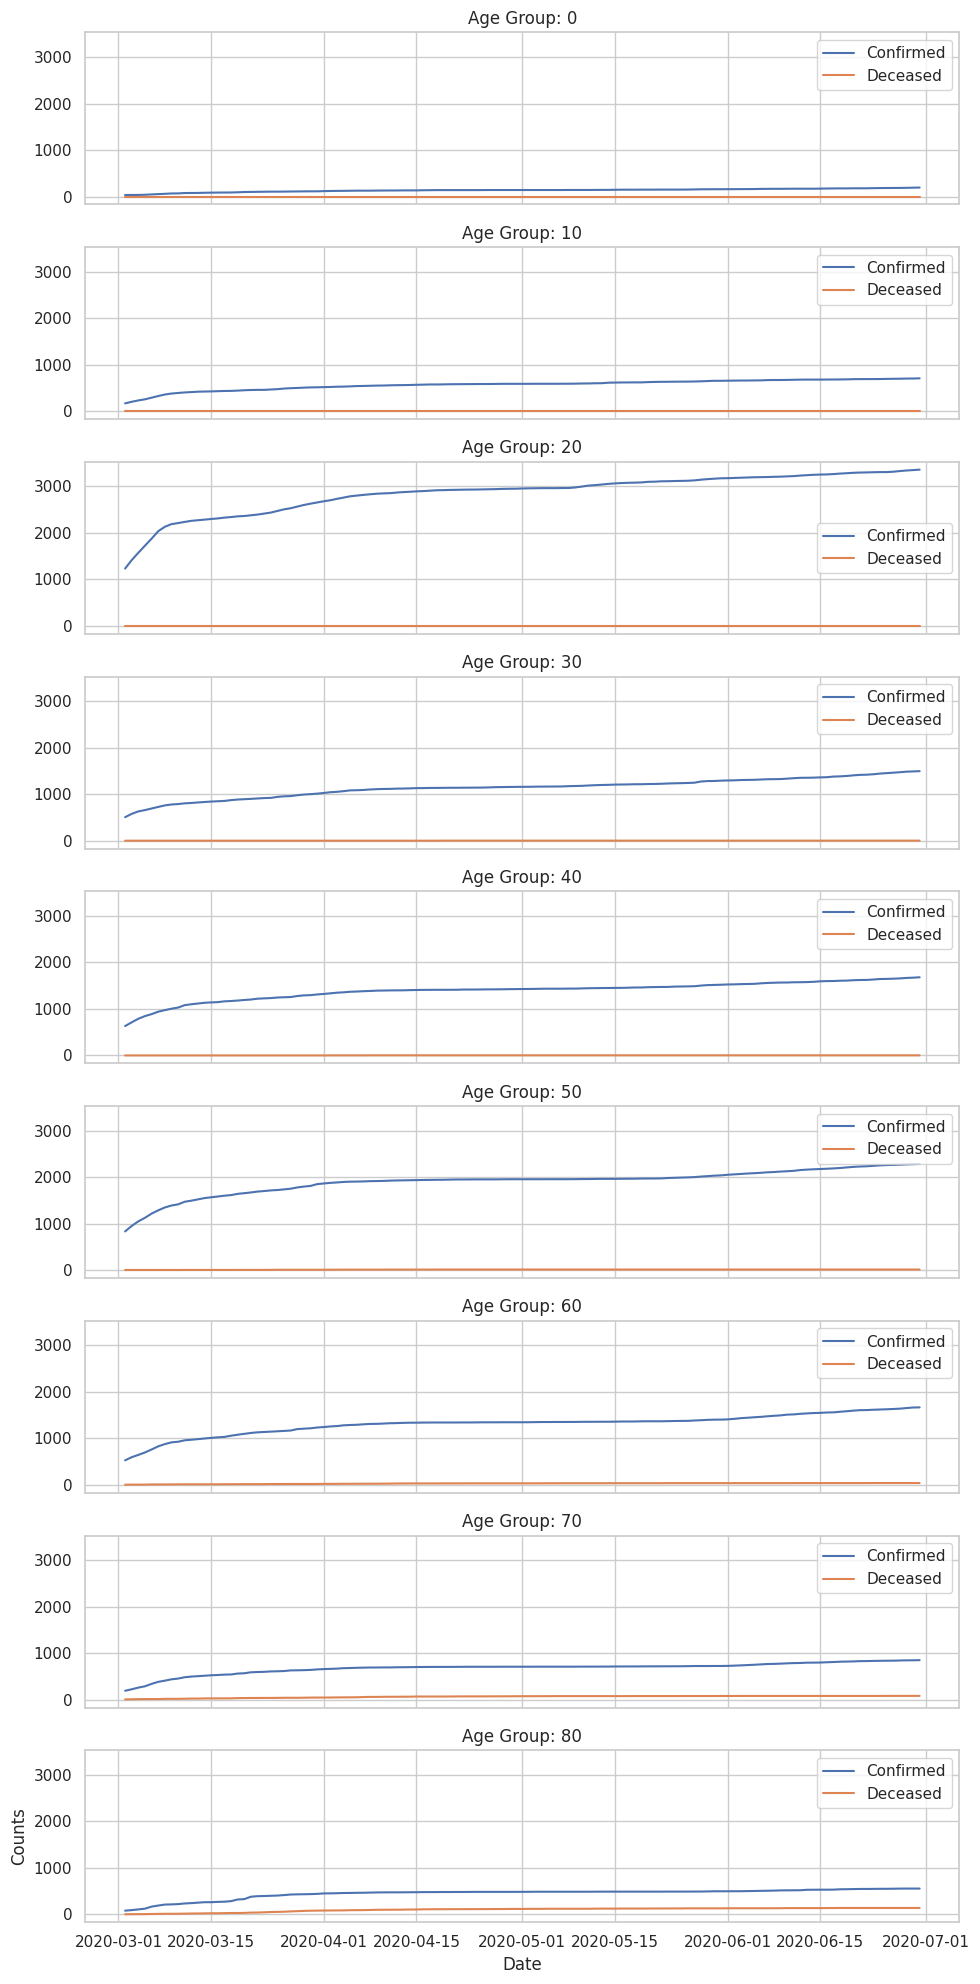

In [52]:
# Assuming 'age_group' is already defined in your DataFrame
age_groups = timeage['age'].unique()

fig, axs = plt.subplots(len(age_groups), figsize=(10,20), sharex=True, sharey=True)

for i, age_group in enumerate(age_groups):
    # Get data for this age group
    age_group_data = timeage[timeage['age'] == age_group]

    # Group by 'date' and calculate sums
    grouped_data = age_group_data.groupby('date')[['confirmed', 'deceased']].sum().reset_index()

    # Plot on the i-th subplot
    axs[i].plot(grouped_data['date'], grouped_data['confirmed'], label='Confirmed')
    axs[i].plot(grouped_data['date'], grouped_data['deceased'], label='Deceased')

    axs[i].set_title(f'Age Group: {age_group}')
    axs[i].legend()

plt.xlabel('Date')  # x-axis label for all subplots
plt.ylabel('Counts')  # y-axis label for all subplots
plt.tight_layout()  # adjust subplot parameters for better spacing
plt.show()


# Time Gender

## Data Cleaning Time Gender

In [65]:
result_timegender = data_cleaning(timegender)
result_timegender

======== Data Overview ========

Shape of data: (242, 5)

Columns in data: 
['date', 'time', 'sex', 'confirmed', 'deceased']

======== Data Info ========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       242 non-null    object
 1   time       242 non-null    int64 
 2   sex        242 non-null    object
 3   confirmed  242 non-null    int64 
 4   deceased   242 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 9.6+ KB

======== Data Description ========
              date   time   sex    confirmed    deceased
count          242  242.0   242   242.000000  242.000000
unique         121    NaN     2          NaN         NaN
top     2020-03-02    NaN  male          NaN         NaN
freq             2    NaN   121          NaN         NaN
mean           NaN    0.0   NaN  5211.545455  105.384298
std            NaN    0.0   NaN  1293.219

In [66]:
timegender['date'] = pd.to_datetime(timegender['date'])

In [67]:
timegender.set_index('date',inplace=True)

In [68]:
timegender.head()

time     sex  confirmed  deceased
date                                         
2020-03-02     0    male       1591        13
2020-03-02     0  female       2621         9
2020-03-03     0    male       1810        16
2020-03-03     0  female       3002        12
2020-03-04     0    male       1996        20

In [69]:
timegender.dtypes

time          int64
sex          object
confirmed     int64
deceased      int64
dtype: object

## Visualization Time Gender

The resulting bar chart shows two sets of bars representing the counts of confirmed and deceased cases for each sex group

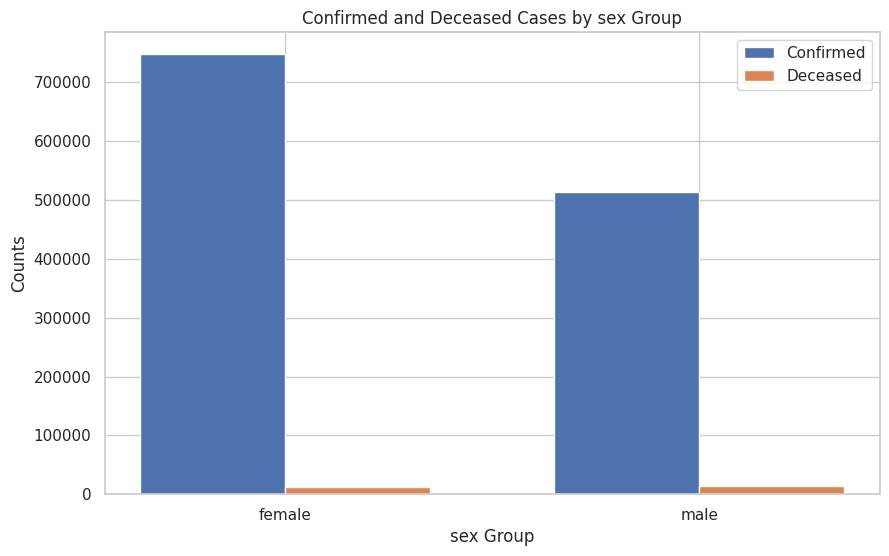

In [70]:
# Group by 'age_group' and calculate sums
grouped_data = timegender.groupby('sex')[['confirmed', 'deceased']].sum().reset_index()

# Create bar chart
plt.figure(figsize=(10,6))
bar_width = 0.35
index = np.arange(len(grouped_data['sex']))

plt.bar(index, grouped_data['confirmed'], bar_width, label='Confirmed')
plt.bar(index + bar_width, grouped_data['deceased'], bar_width, label='Deceased')

plt.xlabel('sex Group')
plt.ylabel('Counts')
plt.title('Confirmed and Deceased Cases by sex Group')
plt.xticks(index + bar_width/2, grouped_data['sex'])  # place age group labels in the middle of the two bars

plt.legend()
plt.show()

The resulting line chart shows two lines representing the counts of confirmed and deceased cases over time

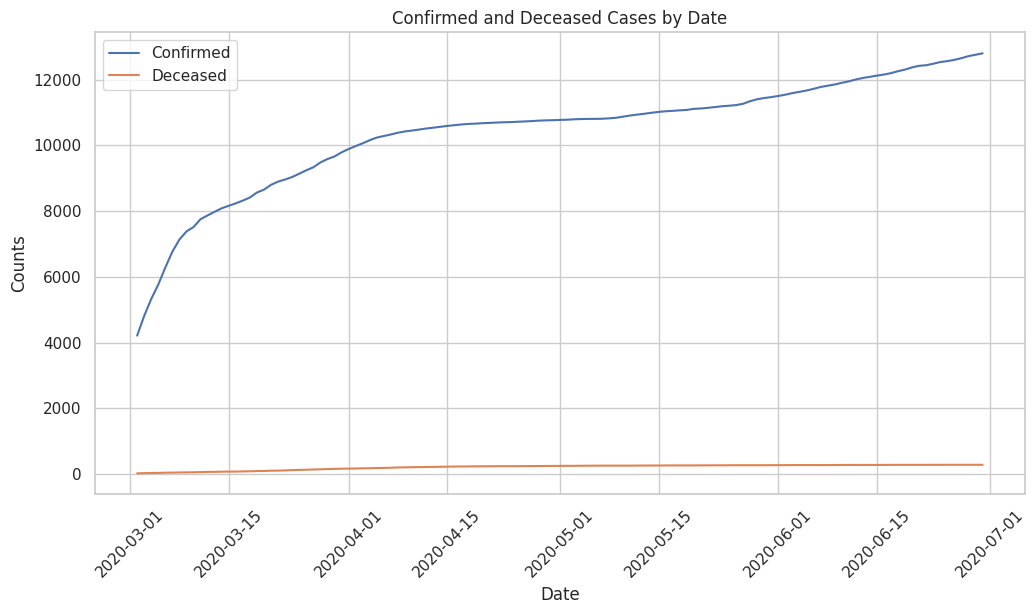

In [71]:
# Group by 'date' and calculate sums
grouped_data_by_date = timegender.groupby('date')[['confirmed', 'deceased']].sum().reset_index()

# Create line chart
plt.figure(figsize=(12,6))

plt.plot(grouped_data_by_date['date'], grouped_data_by_date['confirmed'], label='Confirmed')
plt.plot(grouped_data_by_date['date'], grouped_data_by_date['deceased'], label='Deceased')

plt.xlabel('Date')
plt.ylabel('Counts')
plt.title('Confirmed and Deceased Cases by Date')
plt.xticks(rotation=45)  # rotate x-axis labels for better visibility

plt.legend()
plt.show()


The resulting line plot shows separate lines for each sex and condition (confirmed and deceased) representing the counts of cases over time.

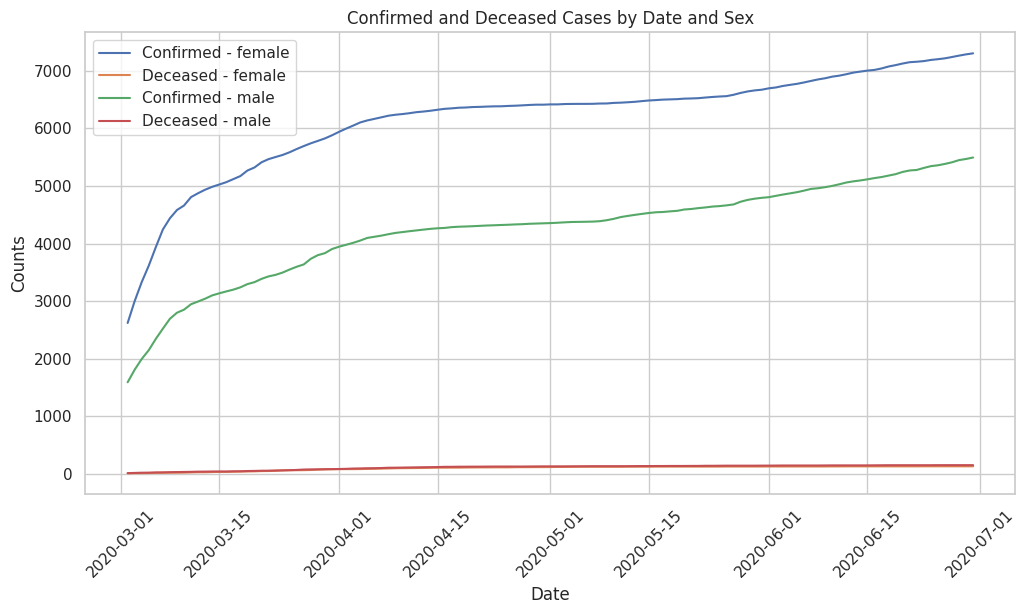

In [73]:

# Group by 'date' and 'sex' and calculate sums
grouped_data = timegender.groupby(['date', 'sex'])[['confirmed', 'deceased']].sum().reset_index()

# Get unique sexes in data
sexes = grouped_data['sex'].unique()

# Plot data
plt.figure(figsize=(12,6))

# Create separate lines for each sex and condition
for sex in sexes:
    sex_data = grouped_data[grouped_data['sex'] == sex]
    plt.plot(sex_data['date'], sex_data['confirmed'], label=f'Confirmed - {sex}')
    plt.plot(sex_data['date'], sex_data['deceased'], label=f'Deceased - {sex}')

plt.xlabel('Date')
plt.ylabel('Counts')
plt.title('Confirmed and Deceased Cases by Date and Sex')
plt.xticks(rotation=45)  # rotate x-axis labels for better visibility
plt.legend()
plt.show()


# Time Province

## Data Cleaning Time Province

In [74]:
result_timeprovince = data_cleaning(timeprovince)
result_timeprovince

======== Data Overview ========

Shape of data: (2771, 6)

Columns in data: 
['date', 'time', 'province', 'confirmed', 'released', 'deceased']

======== Data Info ========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       2771 non-null   object
 1   time       2771 non-null   int64 
 2   province   2771 non-null   object
 3   confirmed  2771 non-null   int64 
 4   released   2771 non-null   int64 
 5   deceased   2771 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 130.0+ KB

======== Data Description ========
              date         time province    confirmed     released  \
count         2771  2771.000000     2771  2771.000000  2771.000000   
unique         163          NaN       17          NaN          NaN   
top     2020-01-20          NaN    Seoul          NaN          NaN   
freq            17          NaN      163  

In [75]:
timeprovince['date'] = pd.to_datetime(timeprovince["date"])

In [76]:
timeprovince.set_index('date',inplace=True)

In [77]:
timeprovince.head()

time province  confirmed  released  deceased
date                                                    
2020-01-20    16    Seoul          0         0         0
2020-01-20    16    Busan          0         0         0
2020-01-20    16    Daegu          0         0         0
2020-01-20    16  Incheon          1         0         0
2020-01-20    16  Gwangju          0         0         0

## Visualization Time Province

The resulting grouped bar chart visualizes the counts of confirmed, released, and deceased cases for each province. The x-axis represents the provinces, and the y-axis represents the counts.

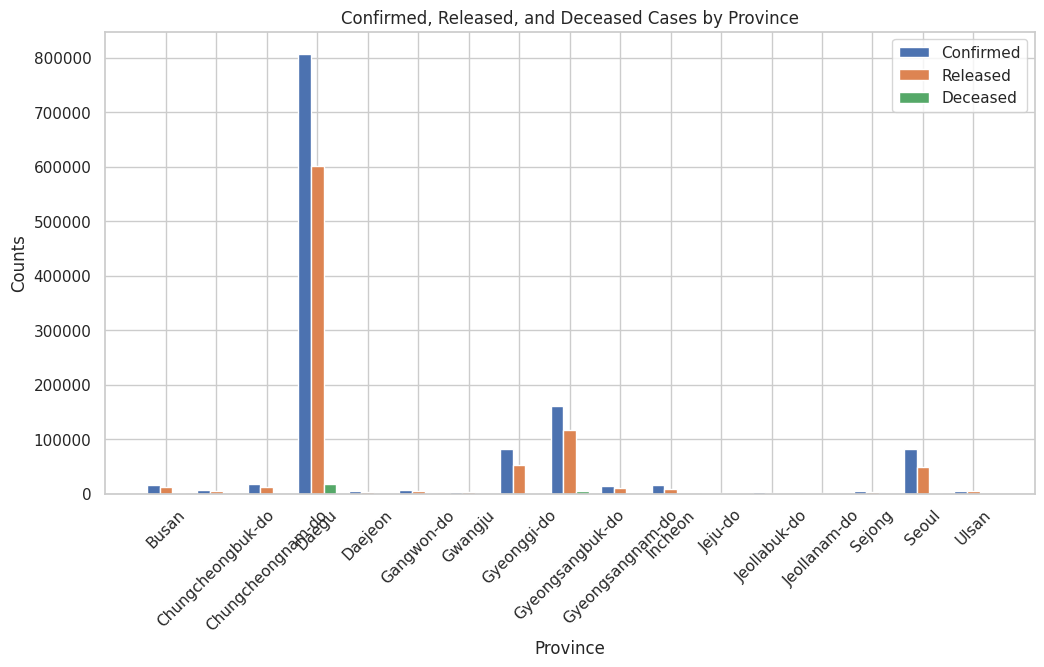

In [80]:
# Group by 'province' and calculate sums
grouped_data = timeprovince.groupby('province')[['confirmed', 'released', 'deceased']].sum().reset_index()

# Define bar width and indices
bar_width = 0.25
indices = np.arange(len(grouped_data))

# Create grouped bar chart
plt.figure(figsize=(12,6))

plt.bar(indices, grouped_data['confirmed'], bar_width, label='Confirmed')
plt.bar(indices + bar_width, grouped_data['released'], bar_width, label='Released')
plt.bar(indices + 2*bar_width, grouped_data['deceased'], bar_width, label='Deceased')

plt.xlabel('Province')
plt.ylabel('Counts')
plt.title('Confirmed, Released, and Deceased Cases by Province')
plt.xticks(indices + bar_width, grouped_data['province'], rotation=45)  # position x-axis labels at the center of the group of bars
plt.legend()
plt.show()


# Weather

## Data Cleaning Weather

In [81]:
result_weather = data_cleaning(weather)
result_weather

======== Data Overview ========

Shape of data: (26271, 10)

Columns in data: 
['code', 'province', 'date', 'avg_temp', 'min_temp', 'max_temp', 'precipitation', 'max_wind_speed', 'most_wind_direction', 'avg_relative_humidity']

======== Data Info ========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26271 entries, 0 to 26270
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   code                   26271 non-null  int64  
 1   province               26271 non-null  object 
 2   date                   26271 non-null  object 
 3   avg_temp               26256 non-null  float64
 4   min_temp               26266 non-null  float64
 5   max_temp               26268 non-null  float64
 6   precipitation          26271 non-null  float64
 7   max_wind_speed         26262 non-null  float64
 8   most_wind_direction    26242 non-null  float64
 9   avg_relative_humidity  26251 non-null  float64
dtypes: flo

In [82]:
weather['date'] = pd.to_datetime(weather['date'])

In [83]:
weather.set_index('date',inplace=True)

In [84]:
weather.dtypes

code                       int64
province                  object
avg_temp                 float64
min_temp                 float64
max_temp                 float64
precipitation            float64
max_wind_speed           float64
most_wind_direction      float64
avg_relative_humidity    float64
dtype: object

In [85]:
weather.head()

code province  avg_temp  min_temp  max_temp  precipitation  \
date                                                                      
2016-01-01  10000    Seoul       1.2      -3.3       4.0            0.0   
2016-01-01  11000    Busan       5.3       1.1      10.9            0.0   
2016-01-01  12000    Daegu       1.7      -4.0       8.0            0.0   
2016-01-01  13000  Gwangju       3.2      -1.5       8.1            0.0   
2016-01-01  14000  Incheon       3.1      -0.4       5.7            0.0   

            max_wind_speed  most_wind_direction  avg_relative_humidity  
date                                                                    
2016-01-01             3.5                 90.0                   73.0  
2016-01-01             7.4                340.0                   52.1  
2016-01-01             3.7                270.0                   70.5  
2016-01-01             2.7                230.0                   73.1  
2016-01-01             5.3                180.0                   83.9

In [86]:
weather['province'].unique().sum()

'SeoulBusanDaeguGwangjuIncheonDaejeonUlsanGyeonggi-doGangwon-doChungcheongbuk-doChungcheongnam-doJeollabuk-doJeollanam-doGyeongsangbuk-doGyeongsangnam-doJeju-doChunghceongbuk-do'

## Visualization Weather

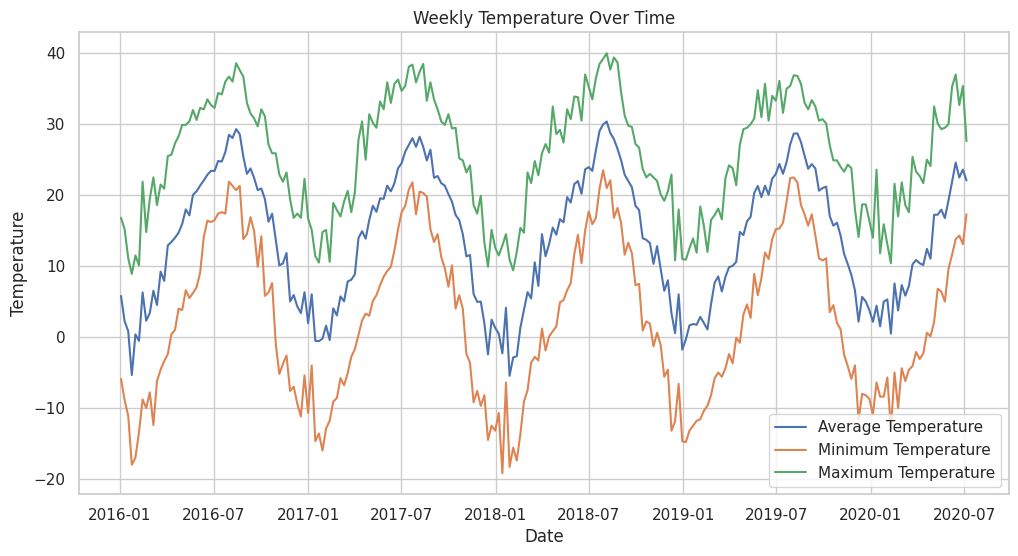

In [88]:
# Resample and calculate sum
weather_avg_weekly = weather['avg_temp'].resample('W').mean()  # Use mean for average temperature
weather_min_weekly = weather['min_temp'].resample('W').min()  # Use min for minimum temperature
weather_max_weekly = weather['max_temp'].resample('W').max()  # Use max for maximum temperature

plt.figure(figsize=(12, 6))

# Plot average weekly temperature
plt.plot(weather_avg_weekly.index, weather_avg_weekly, label='Average Temperature')

# Optionally, you can also plot min and max weekly temperatures
plt.plot(weather_min_weekly.index, weather_min_weekly, label='Minimum Temperature')
plt.plot(weather_max_weekly.index, weather_max_weekly, label='Maximum Temperature')

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Weekly Temperature Over Time')
plt.legend()

plt.show()

<ipython-input-90-c37eab49e194>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temperature_stats = weather.groupby('province')['avg_temp', 'min_temp', 'max_temp'].agg(['mean', 'min', 'max'])


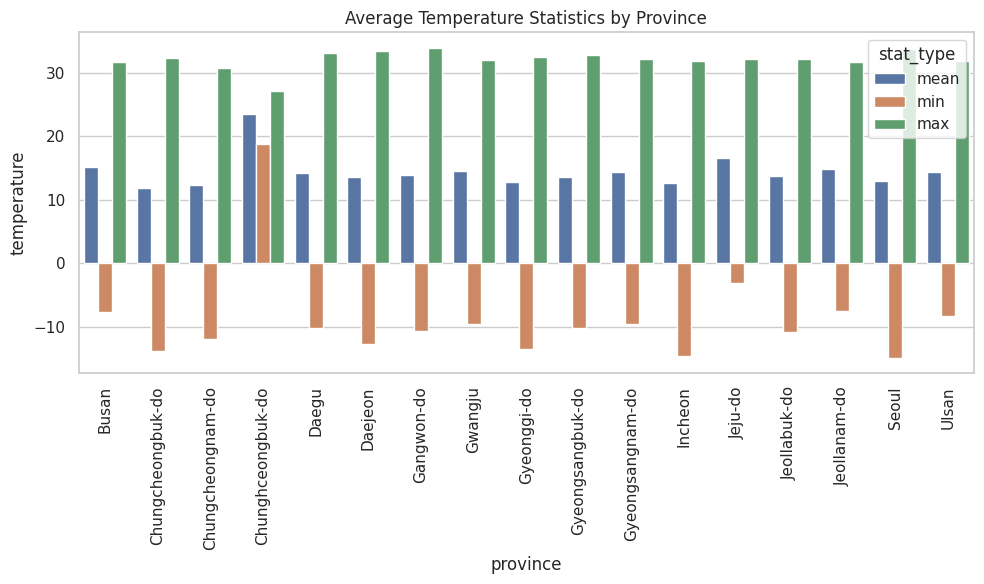

In [90]:
# Group by 'province' and calculate average, min, and max temperatures
temperature_stats = weather.groupby('province')['avg_temp', 'min_temp', 'max_temp'].agg(['mean', 'min', 'max'])

# Reset the index of temperature_stats to melt the DataFrame later
temperature_stats.reset_index(inplace=True)

# Convert data to long format
long_data = pd.melt(temperature_stats, id_vars='province', var_name=['temp_type', 'stat_type'], value_name='temperature')

# Separate the data for average, min, and max temperatures
avg_temp_data = long_data[long_data['temp_type'] == 'avg_temp']
min_temp_data = long_data[long_data['temp_type'] == 'min_temp']
max_temp_data = long_data[long_data['temp_type'] == 'max_temp']

# Create barplots
fig, axs = plt.subplots(figsize=(10, 6))

sns.barplot(x='province', y='temperature', hue='stat_type', data=avg_temp_data)
axs.set_title('Average Temperature Statistics by Province')
axs.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


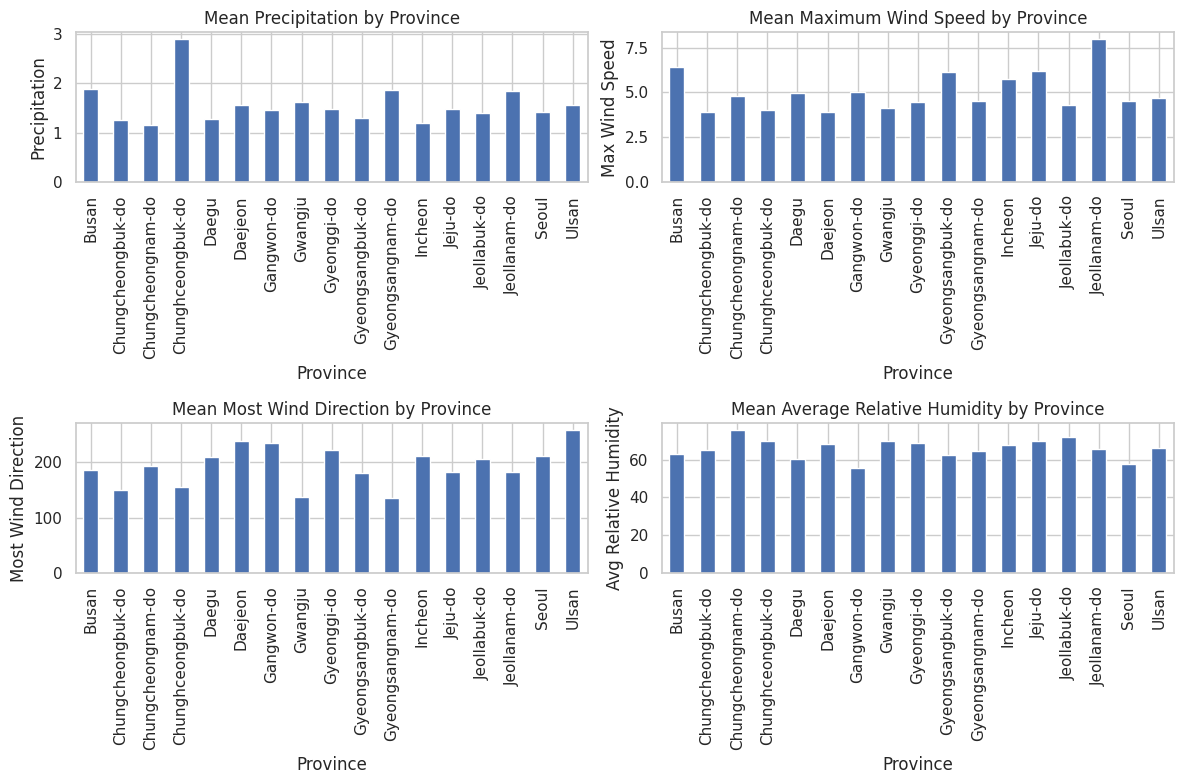

In [92]:
# Group the dataset by province and calculate the mean or maximum values for each variable
grouped_data = weather.groupby('province').agg({'precipitation': 'mean',
                                           'max_wind_speed': 'mean',
                                           'most_wind_direction': 'mean',
                                           'avg_relative_humidity': 'mean'})

# Create bar plots for each variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

# Precipitation
grouped_data['precipitation'].plot(kind='bar', ax=axes[0])
axes[0].set_title('Mean Precipitation by Province')
axes[0].set_xlabel('Province')
axes[0].set_ylabel('Precipitation')

# Maximum Wind Speed
grouped_data['max_wind_speed'].plot(kind='bar', ax=axes[1])
axes[1].set_title('Mean Maximum Wind Speed by Province')
axes[1].set_xlabel('Province')
axes[1].set_ylabel('Max Wind Speed')

# Most Wind Direction
grouped_data['most_wind_direction'].plot(kind='bar', ax=axes[2])
axes[2].set_title('Mean Most Wind Direction by Province')
axes[2].set_xlabel('Province')
axes[2].set_ylabel('Most Wind Direction')

# Average Relative Humidity
grouped_data['avg_relative_humidity'].plot(kind='bar', ax=axes[3])
axes[3].set_title('Mean Average Relative Humidity by Province')
axes[3].set_xlabel('Province')
axes[3].set_ylabel('Avg Relative Humidity')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()